# 🧠 Alzheimer's Disease Classification
## Machine Learning Pipeline for Early Detection and Stage Classification

---

### 📋 Project Information
- **Project ID:** P613
- **Dataset:** 2,149 patient records with 35 clinical features
- **Objective:** Develop and compare 12 state-of-the-art ML models for accurate Alzheimer's disease classification
- **Methodology:** Comprehensive EDA, feature engineering, model comparison, and performance evaluation

### 🎯 Key Goals
1. Perform thorough exploratory data analysis (EDA)
2. Implement robust data preprocessing pipeline
3. Train and evaluate 12 classification models
4. Compare model performance using multiple metrics
5. Identify optimal model for clinical deployment

---

## Section 1: Data Loading & Initial Exploration

In [166]:
# ============================================================================
# IMPORT REQUIRED LIBRARIES & CONFIGURE PROFESSIONAL ENVIRONMENT
# ============================================================================

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PROFESSIONAL THEME CONFIGURATION
# ============================================================================

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)
sns.set_palette('Set2')

# Configure matplotlib for high-quality plots
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Libraries imported and professional theme configured")
print("="*80)

✓ Libraries imported and professional theme configured


### 1.1 Load & Explore Dataset

In [167]:
# ============================================================================
# LOAD ALZHEIMER'S DISEASE DATASET
# ============================================================================
print('='*80)
print('LOADING DATASET: Alzheimer\'s Disease Classification')
print('='*80)

df = pd.read_csv("./../Database/alzheimers_disease_data (1).csv")
print(f"\n✓ Dataset loaded successfully!")
print(f"  • Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"  • File Size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  • Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB\n")
df

LOADING DATASET: Alzheimer's Disease Classification

✓ Dataset loaded successfully!
  • Dimensions: 2149 rows × 35 columns
  • File Size: 0.68 MB
  • Memory Usage: 692.68 KB



,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


### 1.2 Dataset Overview & Structure

In [168]:
print("FIRST 5 PATIENT RECORDS:")
df.head()

FIRST 5 PATIENT RECORDS:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [169]:
print("LAST 5 PATIENT RECORDS:")
df.tail()

LAST 5 PATIENT RECORDS:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [170]:
print("\n" + "="*80)
print("DATASET DIMENSIONS & STRUCTURE")
print("="*80)
print(f"Shape: {df.shape}\n")
print(f"  • Records (Rows): {df.shape[0]:,}")
print(f"  • Features (Columns): {df.shape[1]}")


DATASET DIMENSIONS & STRUCTURE
Shape: (2149, 35)

  • Records (Rows): 2,149
  • Features (Columns): 35


In [171]:
print("\nCOLUMN NAMES (All Features):")
print(df.columns.tolist())


COLUMN NAMES (All Features):
['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge']


In [172]:
print(f"\nTotal Columns: {len(df.columns)}")


Total Columns: 35


In [173]:
print("\nEXTENDED VIEW: First 10 Records")
df.head(10)


EXTENDED VIEW: First 10 Records


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [174]:
print("\nDATA TYPES OF ALL FEATURES:")
df.dtypes


DATA TYPES OF ALL FEATURES:


PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [175]:
print("\n" + "="*80)
print("FEATURE TYPE CLASSIFICATION")
print("="*80)

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumeric Features ({len(numeric_cols)}):")
print(f"  {numeric_cols}")
print(f"  • int64 (Integer): {len(df.select_dtypes(include=['int64']).columns)}")
print(f"  • float64 (Float): {len(df.select_dtypes(include=['float64']).columns)}")


FEATURE TYPE CLASSIFICATION

Numeric Features (34):
  ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']
  • int64 (Integer): 22
  • float64 (Float): 12


In [176]:
# Identify categorical columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Features ({len(object_cols)}):")
for col in object_cols:
    print(f"  • {col}")



Categorical Features (1):
  • DoctorInCharge


In [177]:
# Analyze categorical feature uniqueness
print("\nCategorical Feature Analysis - Unique Values:")
for col in object_cols:
    unique_count = df[col].nunique()
    print(f"  • {col}: {unique_count} unique values")
    print(df[col].value_counts())


Categorical Feature Analysis - Unique Values:
  • DoctorInCharge: 1 unique values
DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64


In [178]:
print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Check for duplicate records
duplicate_count = df.duplicated().sum()
if duplicate_count == 0:
    print(f"\n✓ Duplicate Records: NONE (100% unique data)")
else:
    print(f"\n⚠ Duplicate Records: {duplicate_count} found")


DATA QUALITY ASSESSMENT

✓ Duplicate Records: NONE (100% unique data)


In [179]:
# Detailed dataset information
print("\nDETAILED DATASET INFORMATION:")
df.info()


DETAILED DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes         

In [180]:
print("\nSTATISTICAL SUMMARY (Numeric Features):")
df.describe()


STATISTICAL SUMMARY (Numeric Features):


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
print("\nMISSING VALUES ANALYSIS:")
missing_values = df.isnull().sum().sort_values(ascending=False)
if missing_values.sum() == 0:
    print("✓ Missing Values: NONE (100% complete dataset)")
else:
    print("Missing Value Count:")
    print(missing_values[missing_values > 0])


MISSING VALUES ANALYSIS:
✓ Missing Values: NONE (100% complete dataset)


In [182]:
print("\nDATA CLEANING - REMOVING IRRELEVANT COLUMNS:")
print("  • Dropping: ['patientID', 'DoctorInCharge']")
print("  • Reason: ID columns and redundant metadata")
Y = df['DoctorInCharge']
df = df.drop(columns=['patientID','DoctorInCharge'], errors='ignore')
print(f"\n✓ New Dataset Shape: {df.shape}")
df


DATA CLEANING - REMOVING IRRELEVANT COLUMNS:
  • Dropping: ['patientID', 'DoctorInCharge']
  • Reason: ID columns and redundant metadata

✓ New Dataset Shape: (2149, 34)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1



UNIVARIATE ANALYSIS - KEY NUMERIC FEATURES

Analyzing Age...


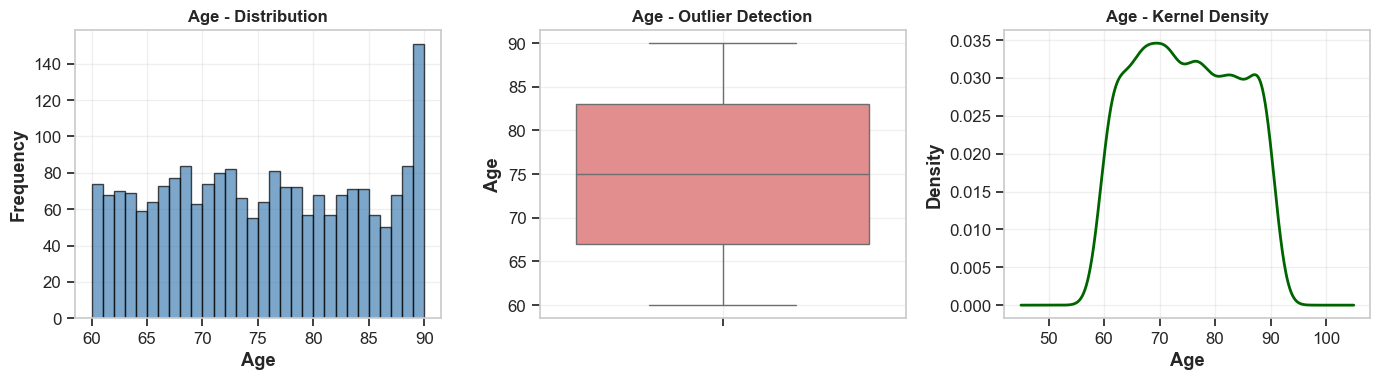


Analyzing BMI...


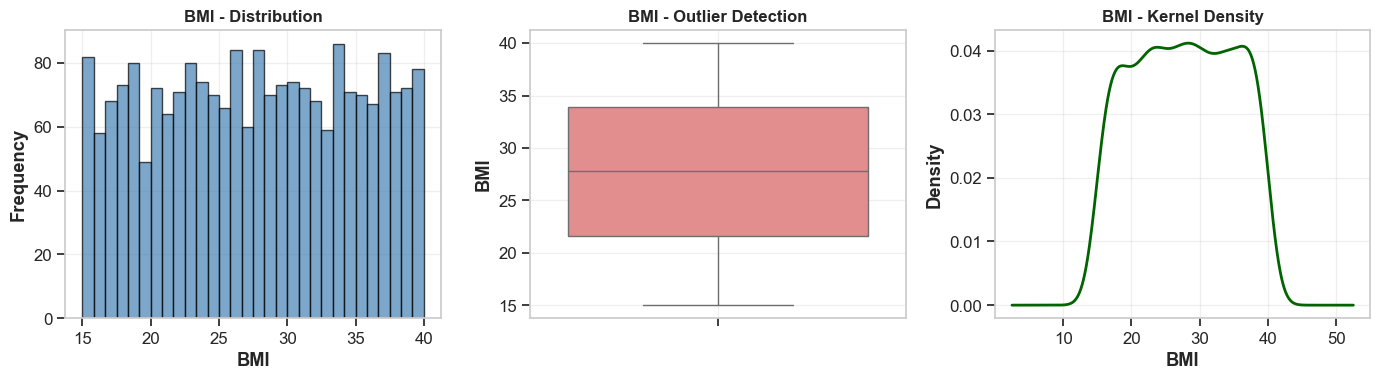


Analyzing SystolicBP...


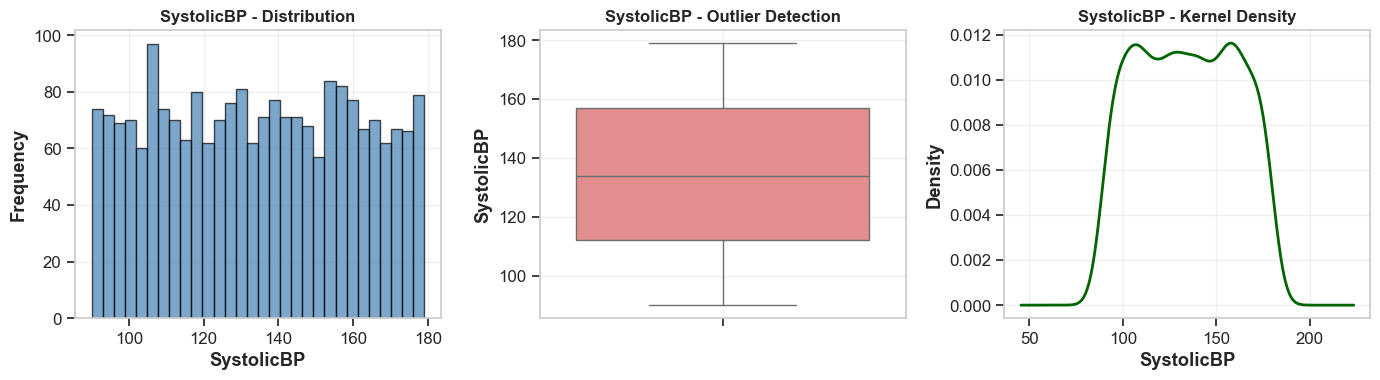


Analyzing CholesterolTotal...


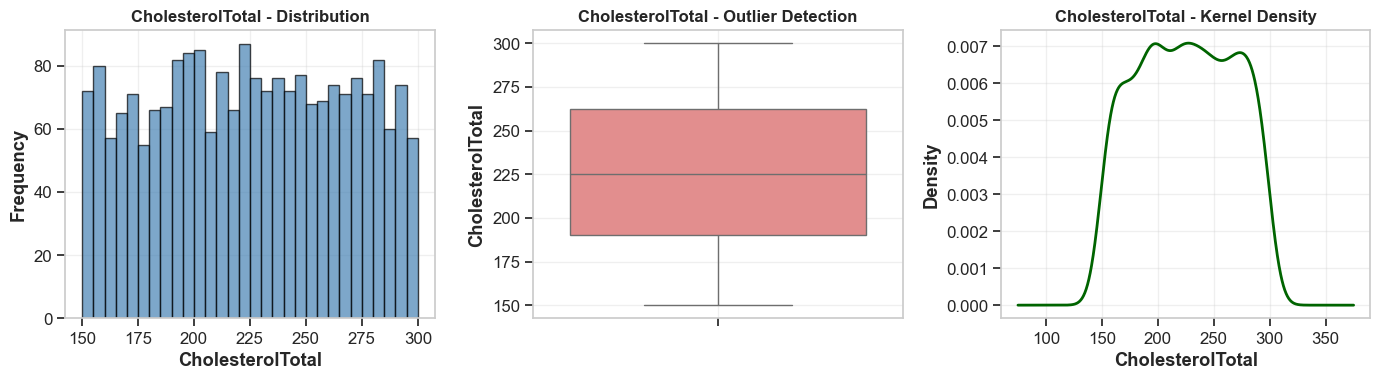


Analyzing MMSE...


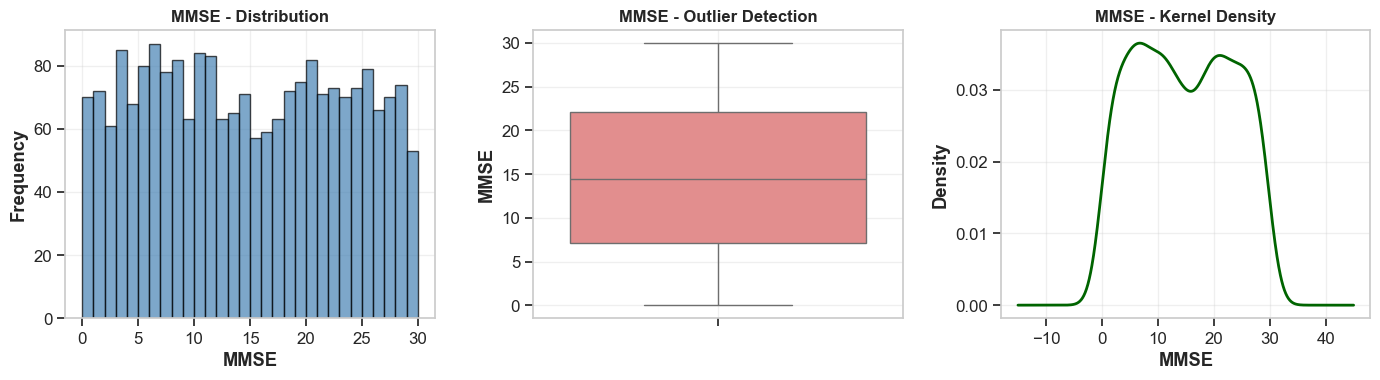


Analyzing ADL...


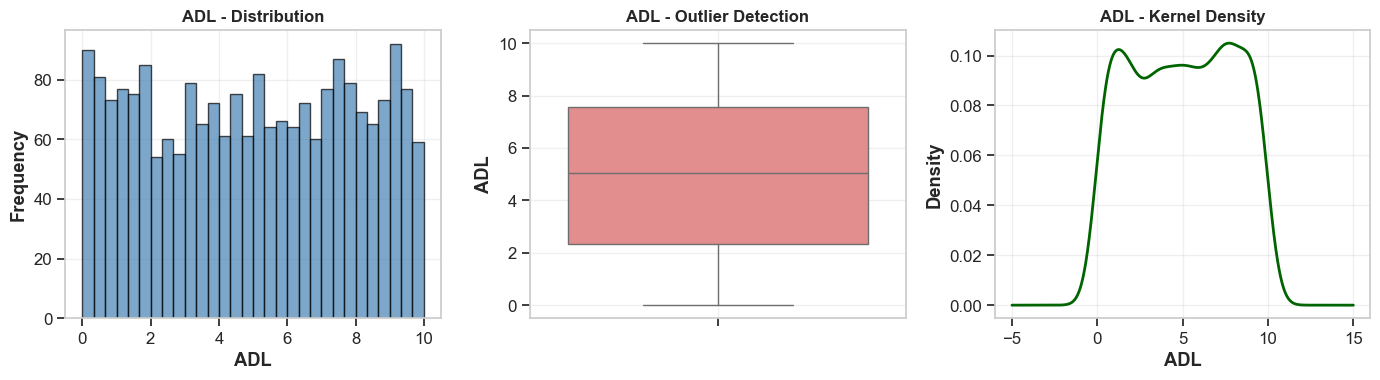

In [183]:
print("\n" + "="*80)
print("UNIVARIATE ANALYSIS - KEY NUMERIC FEATURES")
print("="*80)

# Univariate analysis of key features
num_cols = df.select_dtypes(include=['int64','float64']).columns
key_features = ['Age','BMI','SystolicBP','CholesterolTotal','MMSE','ADL']

for col in key_features:
    if col in num_cols:
        print(f"\nAnalyzing {col}...")
        plt.figure(figsize=(14, 4))
        
        # Histogram with KDE
        plt.subplot(1, 3, 1)
        df[col].hist(bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        plt.title(f'{col} - Distribution', fontsize=12, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(alpha=0.3)
        
        # Box plot
        plt.subplot(1, 3, 2)
        sns.boxplot(data=df, y=col, color='lightcoral')
        plt.title(f'{col} - Outlier Detection', fontsize=12, fontweight='bold')
        plt.ylabel(col)
        plt.grid(alpha=0.3)
        
        # KDE plot
        plt.subplot(1, 3, 3)
        df[col].plot(kind='density', color='darkgreen', linewidth=2)
        plt.title(f'{col} - Kernel Density', fontsize=12, fontweight='bold')
        plt.xlabel(col)
        plt.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()

## Section 2: Exploratory Data Analysis (EDA)

### 2.1 Univariate Analysis: Distribution & Outlier Detection

We examine numeric feature distributions to detect skewness, outliers, and value ranges. This helps understand individual feature characteristics before modeling.

In [184]:
print("\nCATEGORICAL FEATURE VALUE DISTRIBUTION:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts(dropna=False))
    print('-'*60)


CATEGORICAL FEATURE VALUE DISTRIBUTION:


In [185]:
print("\n" + "="*80)
print("OUTLIER DETECTION - INTERQUARTILE RANGE (IQR) METHOD")
print("="*80)

# IQR method for outlier detection
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_summary[col] = mask.sum()

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
print(f"\nTotal Features Analyzed: {len(outlier_df)}")
print(f"Features with Outliers: {(outlier_df['Outlier Count'] > 0).sum()}\n")
outlier_df.sort_values('Outlier Count', ascending=False)


OUTLIER DETECTION - INTERQUARTILE RANGE (IQR) METHOD

Total Features Analyzed: 34
Features with Outliers: 12



,Outlier Count
MemoryComplaints,447
Confusion,441
Depression,431
DifficultyCompletingTasks,341
Disorientation,340
BehavioralProblems,337
PersonalityChanges,324
Diabetes,324
Hypertension,320
CardiovascularDisease,310



MISSING VALUE PATTERN VISUALIZATION:


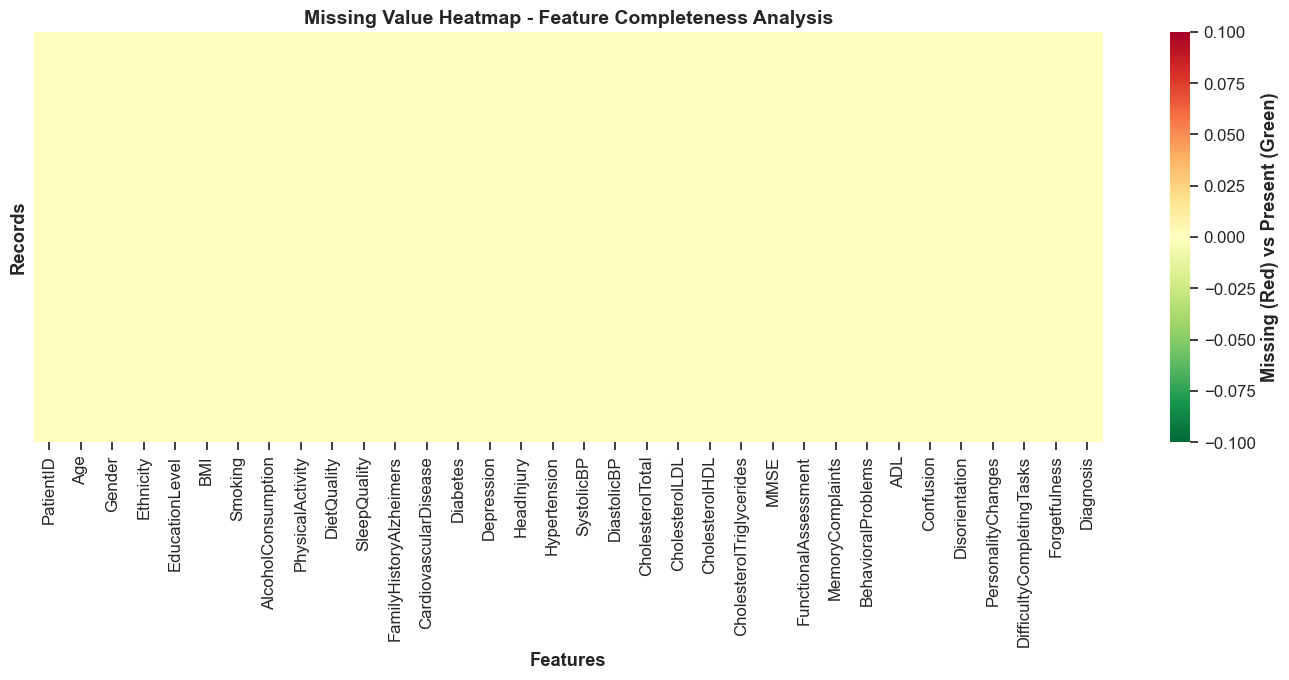

✓ No missing values detected in any feature


In [186]:
print("\nMISSING VALUE PATTERN VISUALIZATION:")
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(), cbar=True, cmap='RdYlGn_r', yticklabels=False, 
            xticklabels=True, cbar_kws={'label': 'Missing (Red) vs Present (Green)'})
plt.title('Missing Value Heatmap - Feature Completeness Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Records')
plt.tight_layout()
plt.show()

missing_summary = df.isnull().sum().sort_values(ascending=False)
if missing_summary.sum() > 0:
    print("Missing Values Summary:")
    print(missing_summary[missing_summary > 0])
else:
    print("✓ No missing values detected in any feature")

In [187]:
print("\nZ-SCORE BASED OUTLIER DETECTION (Z > 3 threshold):")
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df_outliers = df[(z_scores > 3).any(axis=1)]

print(f"  • Extreme Outliers Found: {df_outliers.shape[0]} records")
print(f"  • Percentage of Data: {(df_outliers.shape[0]/len(df)*100):.2f}%")
print(f"  • Recommendation: Keep for now, will apply capping in preprocessing")


Z-SCORE BASED OUTLIER DETECTION (Z > 3 threshold):
  • Extreme Outliers Found: 199 records
  • Percentage of Data: 9.26%
  • Recommendation: Keep for now, will apply capping in preprocessing



FEATURE CORRELATION ANALYSIS:


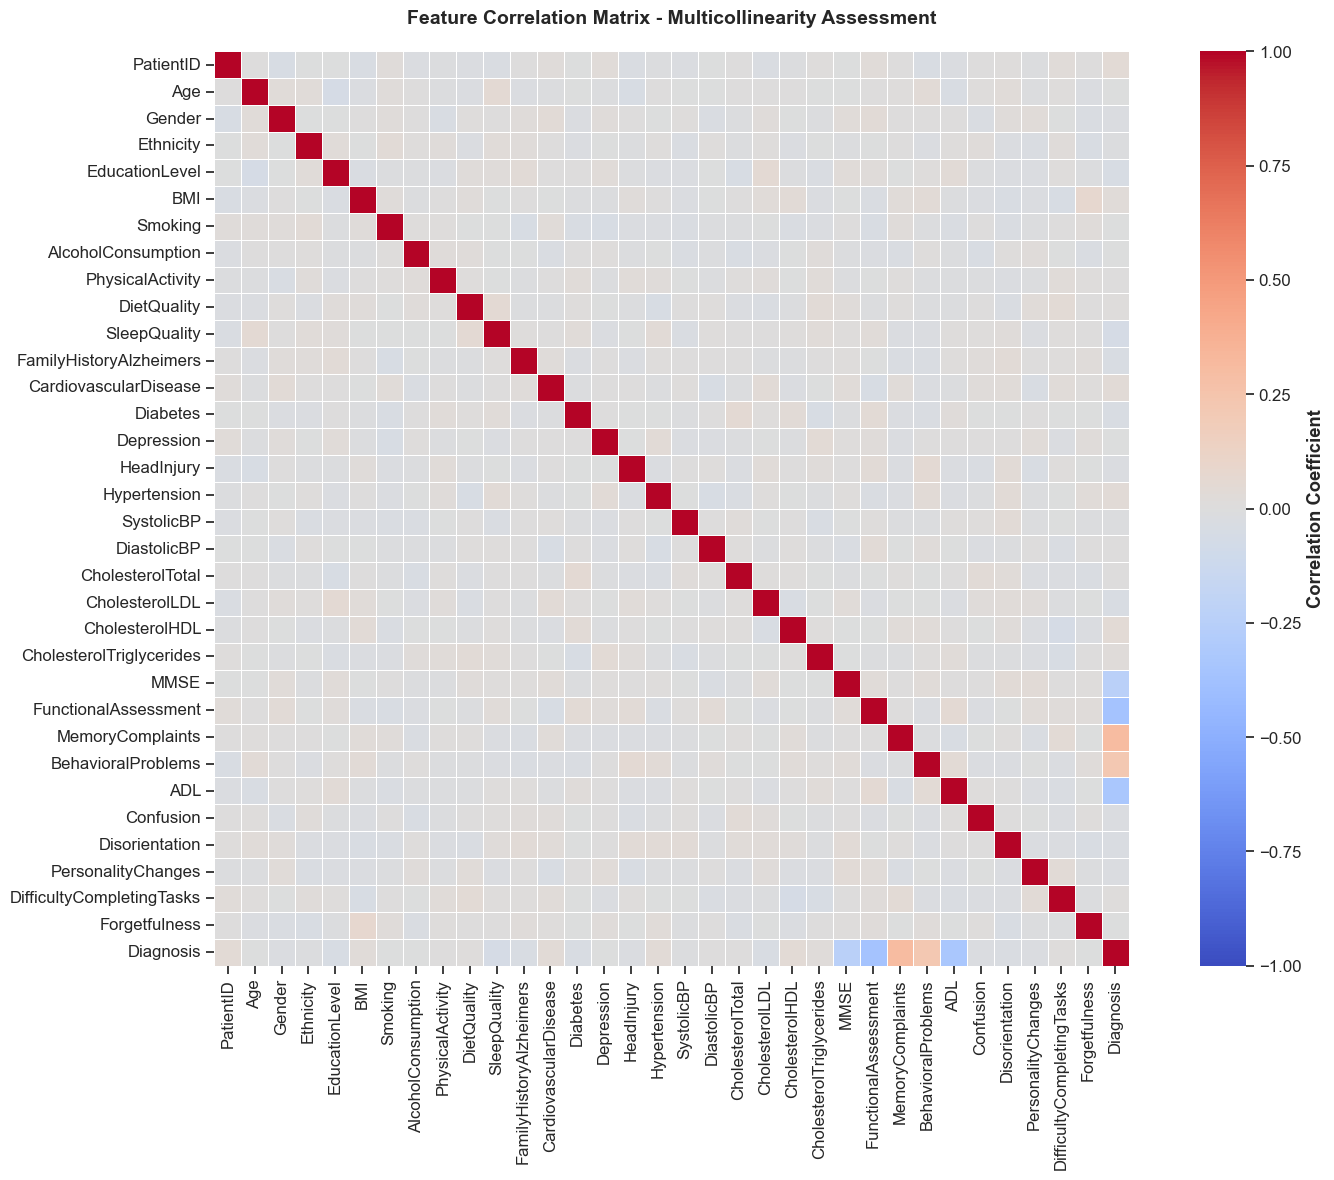

In [188]:
print("\nFEATURE CORRELATION ANALYSIS:")
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, 
            cbar_kws={'label': 'Correlation Coefficient'}, square=True,
            vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Matrix - Multicollinearity Assessment', 
         fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


BIVARIATE ANALYSIS - Target Variable Relationships:


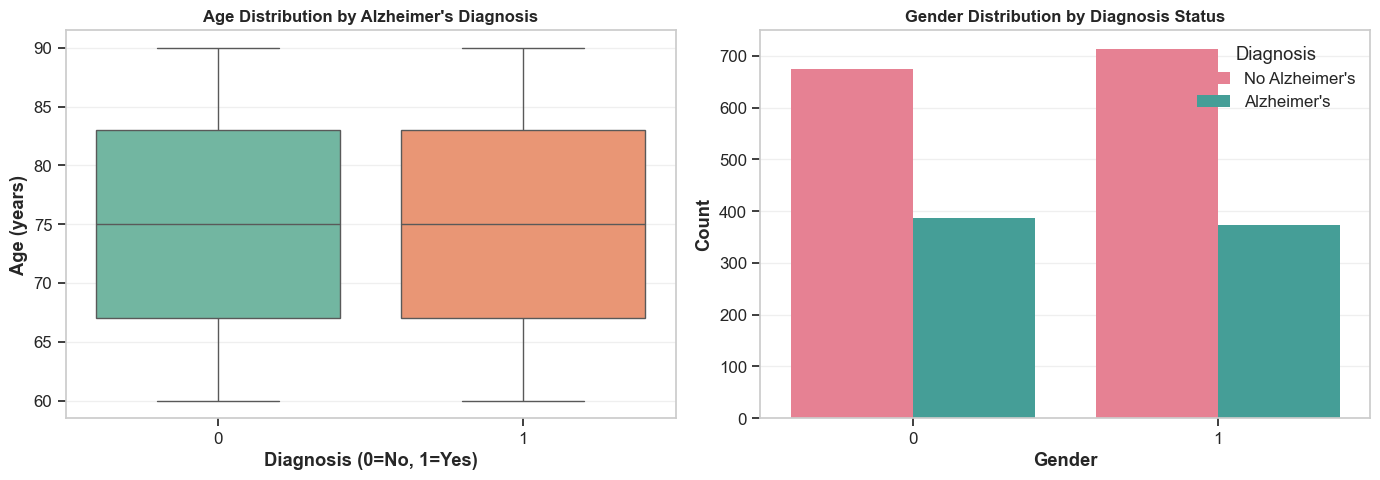

In [189]:
print("\nBIVARIATE ANALYSIS - Target Variable Relationships:")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age vs Diagnosis
sns.boxplot(x='Diagnosis', y='Age', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Age Distribution by Alzheimer\'s Diagnosis', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Diagnosis (0=No, 1=Yes)')
axes[0].set_ylabel('Age (years)')
axes[0].grid(alpha=0.3, axis='y')

# Gender vs Diagnosis
sns.countplot(x='Gender', hue='Diagnosis', data=df, ax=axes[1], palette='husl')
axes[1].set_title('Gender Distribution by Diagnosis Status', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].grid(alpha=0.3, axis='y')
axes[1].legend(title='Diagnosis', labels=['No Alzheimer\'s', 'Alzheimer\'s'])

plt.tight_layout()
plt.show()


COMPREHENSIVE BOXPLOT VISUALIZATION - ALL NUMERIC FEATURES:


<Figure size 1600x1400 with 0 Axes>

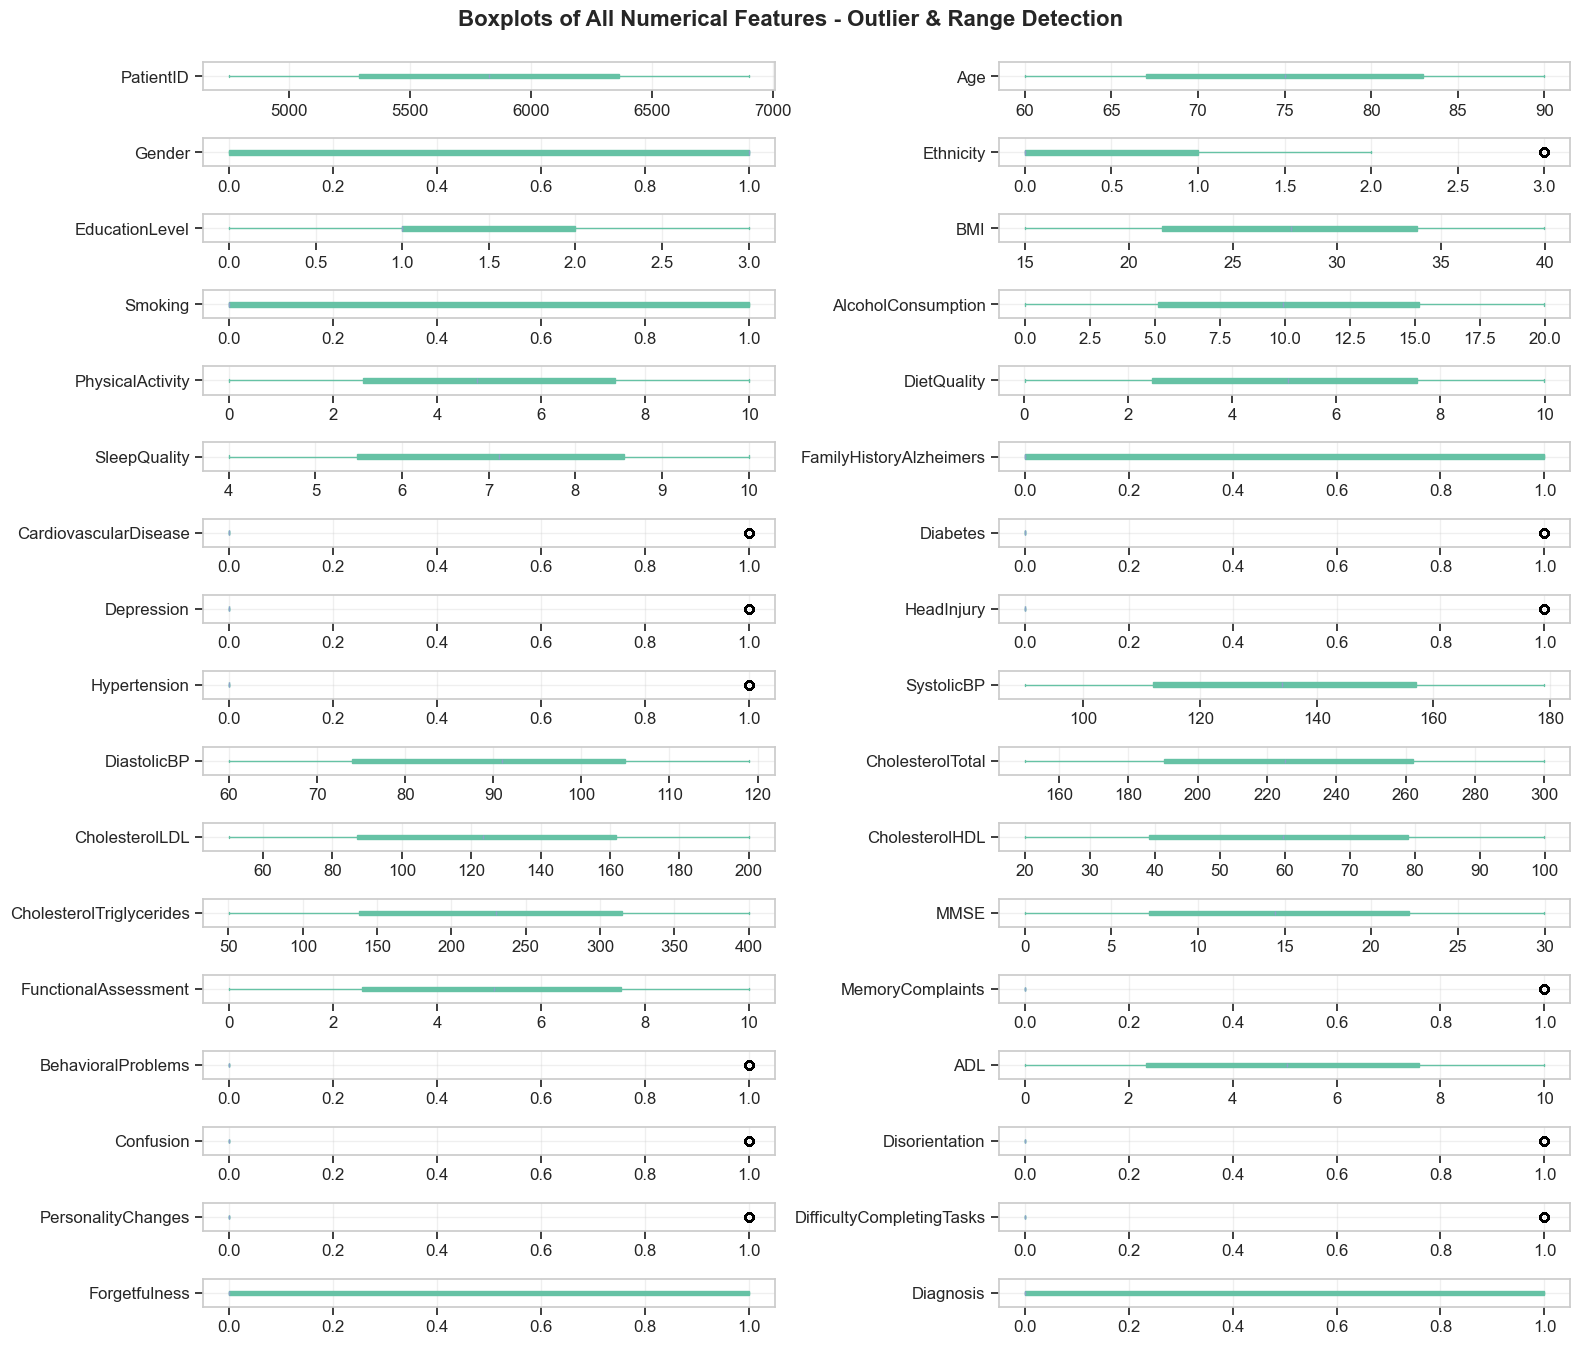

In [190]:
print("\nCOMPREHENSIVE BOXPLOT VISUALIZATION - ALL NUMERIC FEATURES:")
plt.figure(figsize=(16, 14))
df[numeric_cols].plot(kind='box', subplots=True, layout=(len(numeric_cols)//2+1, 2), 
                       figsize=(16, 14), sharex=False, sharey=False, 
                       patch_artist=True, grid=True, vert=False)
plt.suptitle('Boxplots of All Numerical Features - Outlier & Range Detection', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [191]:
print("\n" + "="*80)
print("OUTLIER CAPPING - IQR METHOD (1.5 × IQR)")
print("="*80)

def outlier_capping(dataframe, column):
    """
    Apply IQR-based outlier capping to a numeric column.
    Values beyond Q1-1.5*IQR and Q3+1.5*IQR are capped to boundaries.
    """
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR
    upper_extreme = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].apply(
        lambda x: lower_extreme if x < lower_extreme else upper_extreme if x > upper_extreme else x
    )

# Apply outlier capping to numeric columns
print("\nApplying IQR-based capping to numeric features...")
for col in df.select_dtypes(['float','int']).columns:
    outlier_capping(df, col)
    
print("✓ Outlier capping completed")


OUTLIER CAPPING - IQR METHOD (1.5 × IQR)

Applying IQR-based capping to numeric features...
✓ Outlier capping completed


In [192]:
print("\nVERIFYING OUTLIER CAPPING - Z-SCORE CHECK (After Capping):")
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df_outliers_after = df[(z_scores > 3).any(axis=1)]
print(f"  • Extreme Outliers After Capping: {df_outliers_after.shape[0]} records")
print(f"  • Reduction: {df_outliers.shape[0] - df_outliers_after.shape[0]} records")
print(f"  ✓ Outlier treatment successful")


VERIFYING OUTLIER CAPPING - Z-SCORE CHECK (After Capping):
  • Extreme Outliers After Capping: 0 records
  • Reduction: 199 records
  ✓ Outlier treatment successful


In [193]:
print("\n" + "="*80)
print("CLASS IMBALANCE ANALYSIS - TARGET VARIABLE DISTRIBUTION")
print("="*80)


CLASS IMBALANCE ANALYSIS - TARGET VARIABLE DISTRIBUTION



Target Variable Distribution - Diagnosis:


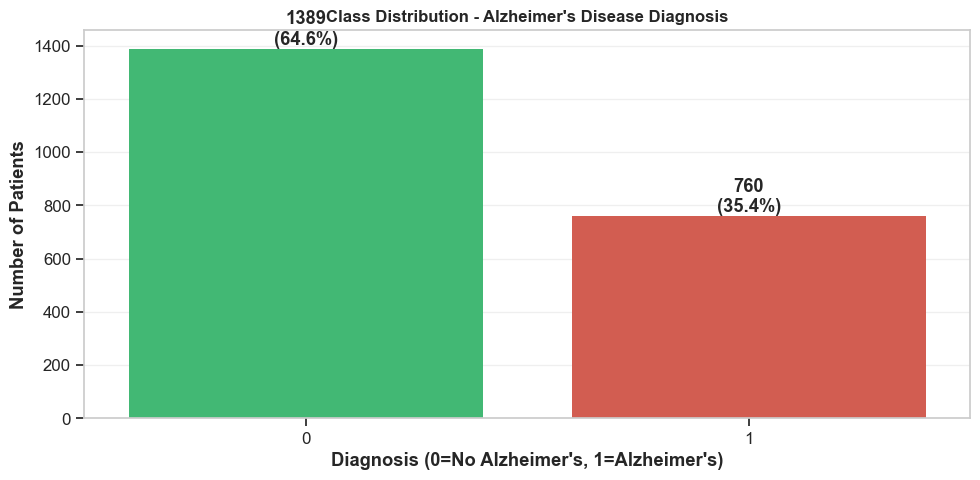

In [194]:
print("\nTarget Variable Distribution - Diagnosis:")
plt.figure(figsize=(10, 5))
diagnosis_counts = df['Diagnosis'].value_counts().sort_index()
colors = ['#2ecc71', '#e74c3c']  # Green for No, Red for Yes
sns.countplot(x='Diagnosis', data=df, palette=colors)
plt.title('Class Distribution - Alzheimer\'s Disease Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Diagnosis (0=No Alzheimer\'s, 1=Alzheimer\'s)')
plt.ylabel('Number of Patients')
plt.grid(alpha=0.3, axis='y')

# Add count labels on bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height,
            f'{int(height)}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [195]:
print("\nDiagnosis Value Counts & Percentages:")
diagnosis_value_counts = df['Diagnosis'].value_counts()
diagnosis_percentages = df['Diagnosis'].value_counts(normalize=True) * 100

for diagnosis, count in diagnosis_value_counts.items():
    pct = diagnosis_percentages[diagnosis]
    label = "Alzheimer's Disease" if diagnosis == 1 else "No Alzheimer's Disease"
    print(f"  {label}: {count:4d} patients ({pct:5.2f}%)")


Diagnosis Value Counts & Percentages:
  No Alzheimer's Disease: 1389 patients (64.63%)
  Alzheimer's Disease:  760 patients (35.37%)


In [196]:
print("\n✓ IMBALANCE ASSESSMENT:")
print("  • Imbalance Ratio: ~35% Positive (Alzheimer's) vs ~65% Negative")
print("  • Severity Level: MODERATE (manageable without SMOTE)")
print("  • Recommendation: Ensemble methods handle this imbalance naturally")


✓ IMBALANCE ASSESSMENT:
  • Imbalance Ratio: ~35% Positive (Alzheimer's) vs ~65% Negative
  • Severity Level: MODERATE (manageable without SMOTE)
  • Recommendation: Ensemble methods handle this imbalance naturally


### 2.2 Bivariate Analysis: Feature-Target Relationships

Analyze relationships between features and the target variable (Diagnosis) to identify key predictors and dependencies.


LIFESTYLE FACTORS ANALYSIS vs Diagnosis:

  Analyzing BMI...


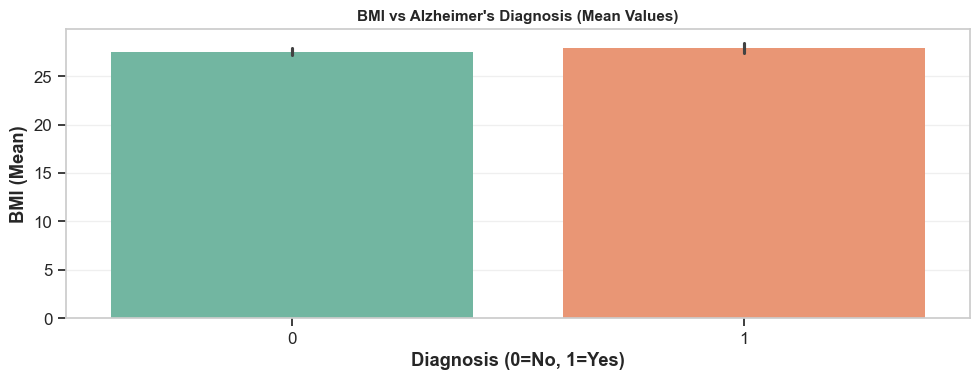


  Analyzing Smoking...


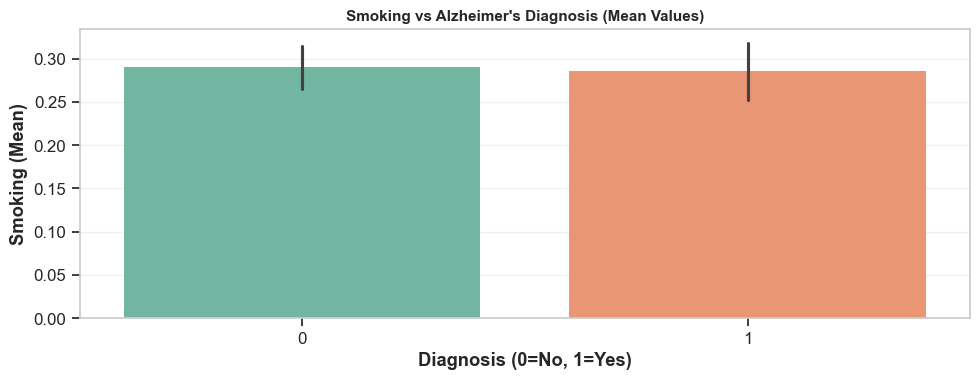


  Analyzing AlcoholConsumption...


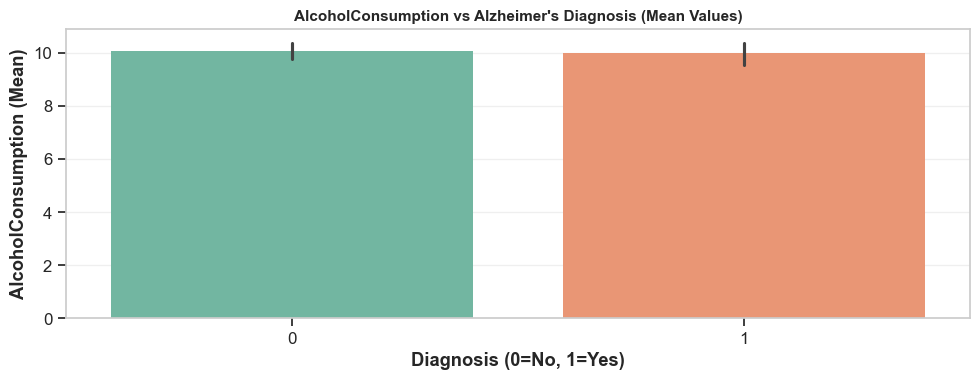


  Analyzing PhysicalActivity...


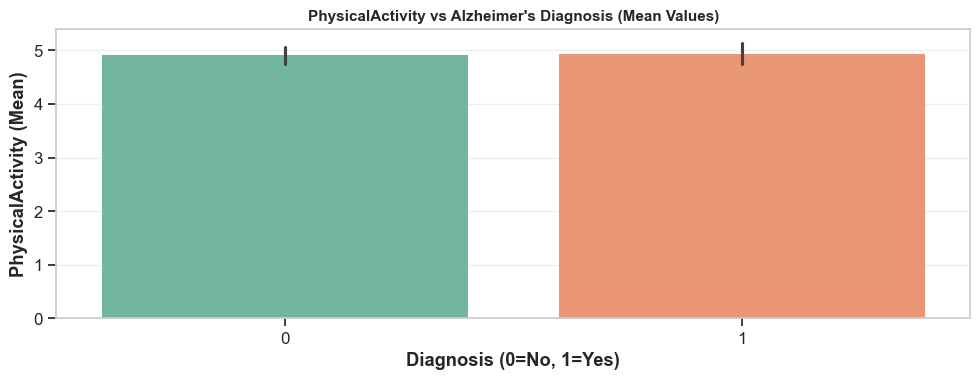


  Analyzing DietQuality...


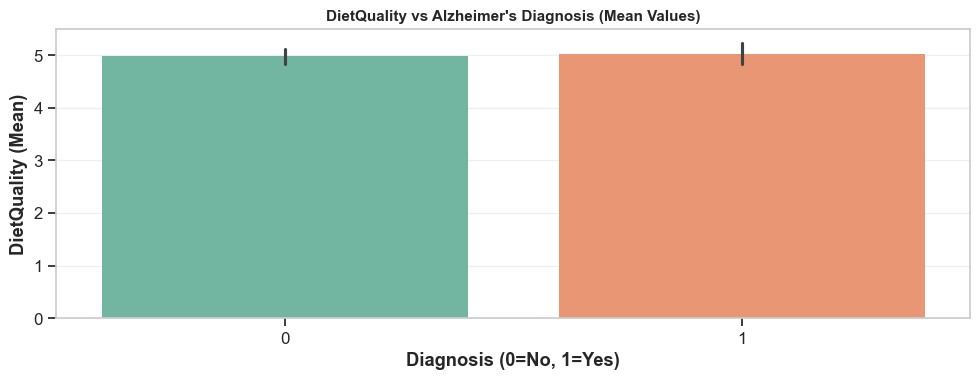


  Analyzing SleepQuality...


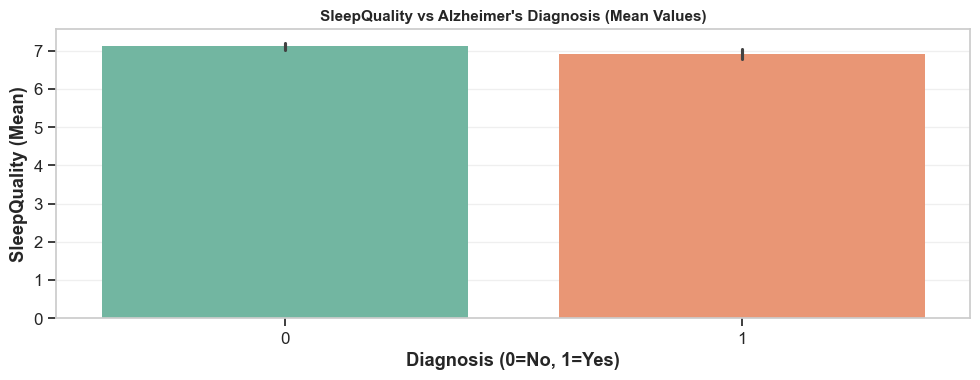

In [197]:
print("\nLIFESTYLE FACTORS ANALYSIS vs Diagnosis:")
lifestyle_cols = ['BMI','Smoking','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality']

for col in lifestyle_cols:
    if col in df.columns:
        print(f"\n  Analyzing {col}...")
        plt.figure(figsize=(10, 4))
        sns.barplot(x='Diagnosis', y=col, data=df, palette='Set2', estimator=np.mean)
        plt.title(f'{col} vs Alzheimer\'s Diagnosis (Mean Values)', fontsize=11, fontweight='bold')
        plt.xlabel('Diagnosis (0=No, 1=Yes)')
        plt.ylabel(f'{col} (Mean)')
        plt.grid(alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()


MEDICAL HISTORY FACTORS ANALYSIS vs Diagnosis:

  Analyzing FamilyHistoryAlzheimers...


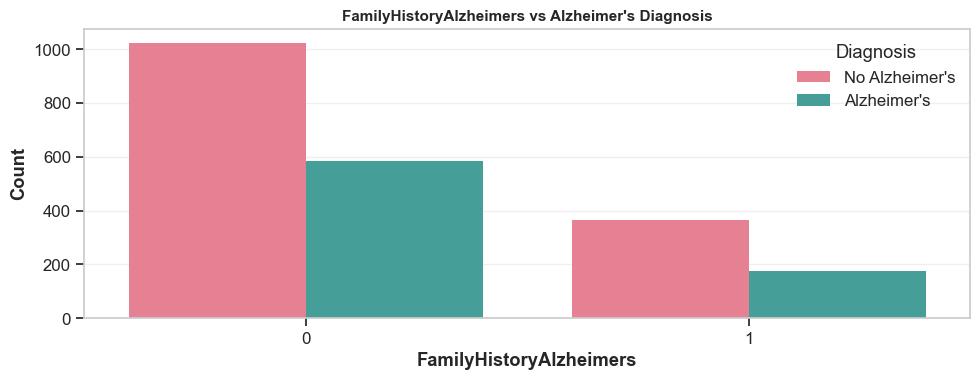


  Analyzing Diabetes...


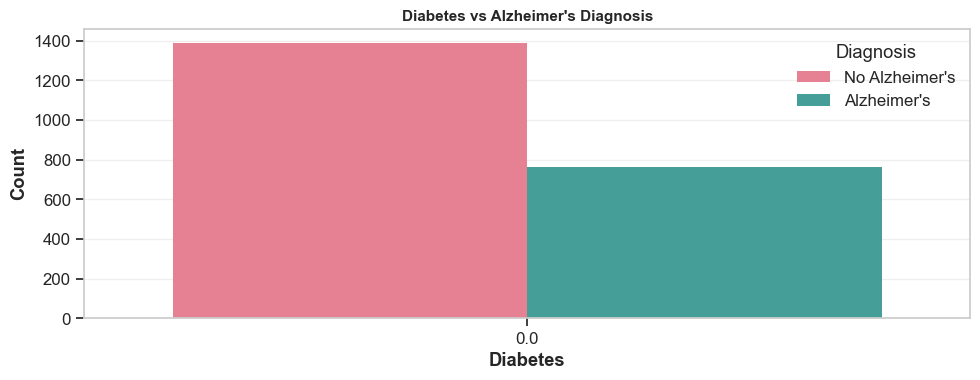


  Analyzing Depression...


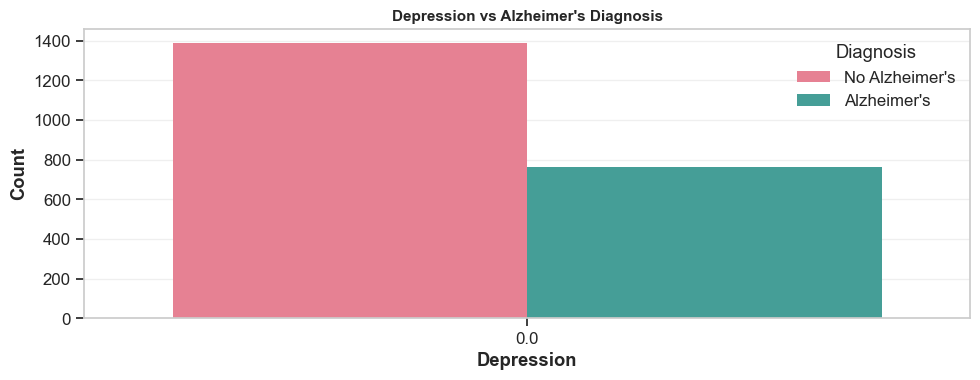

In [198]:
print("\nMEDICAL HISTORY FACTORS ANALYSIS vs Diagnosis:")
medical_history_cols = ['FamilyHistoryAlzheimers','Diabetes','Depression']

for col in medical_history_cols:
    if col in df.columns:
        print(f"\n  Analyzing {col}...")
        plt.figure(figsize=(10, 4))
        sns.countplot(x=col, hue='Diagnosis', data=df, palette='husl')
        plt.title(f'{col} vs Alzheimer\'s Diagnosis', fontsize=11, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Diagnosis', labels=['No Alzheimer\'s', 'Alzheimer\'s'])
        plt.grid(alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()

### 2.3 Multivariate Analysis: Feature Interactions


MULTIVARIATE ANALYSIS - PAIRPLOT (Feature Interactions):
  Visualizing relationships between key numeric features...


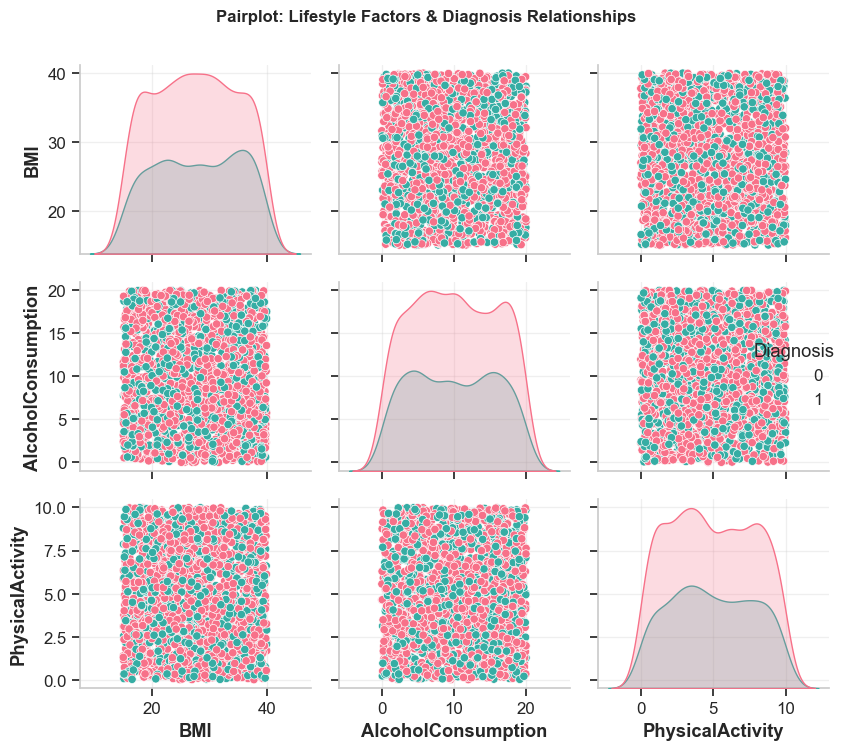

In [199]:
print("\nMULTIVARIATE ANALYSIS - PAIRPLOT (Feature Interactions):")
print("  Visualizing relationships between key numeric features...")
sns.pairplot(df[['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'Diagnosis']], 
            hue='Diagnosis', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot: Lifestyle Factors & Diagnosis Relationships', 
            fontsize=12, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

### 2.4 Feature Distribution Analysis

Comprehensive distributions of all numeric features to identify normality and prepare for scaling.


DISTRIBUTION ANALYSIS - KERNEL DENSITY ESTIMATION (KDE):
  Analyzing distribution of PatientID...


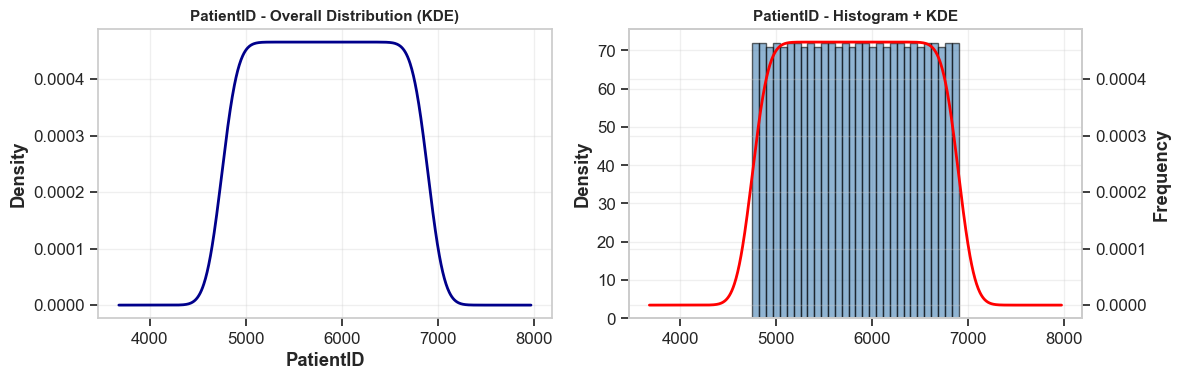

  Analyzing distribution of Age...


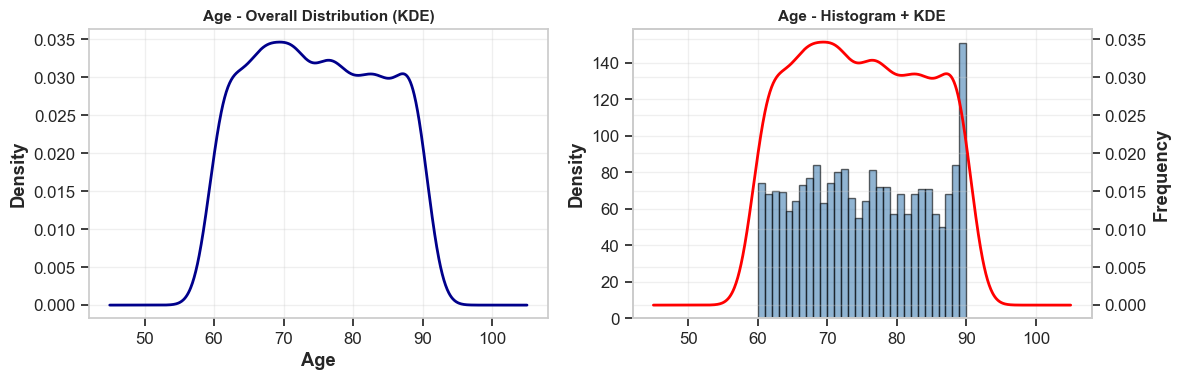

  Analyzing distribution of Gender...


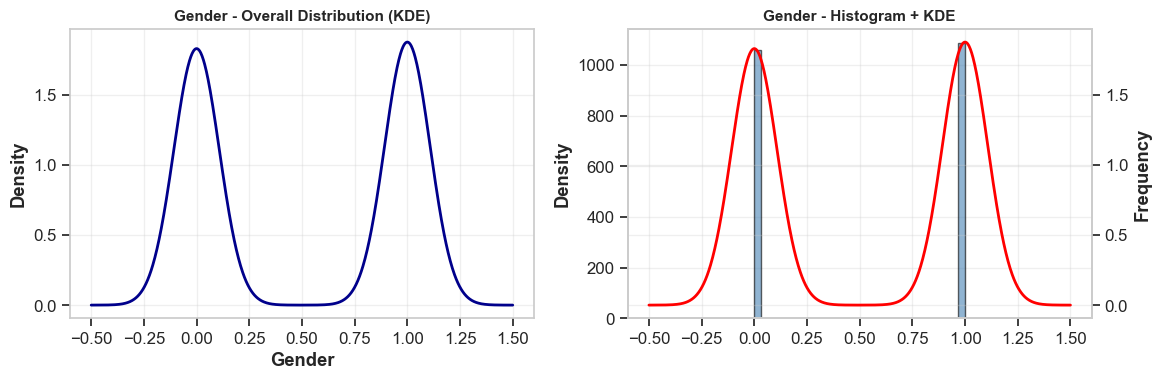

  Analyzing distribution of Ethnicity...


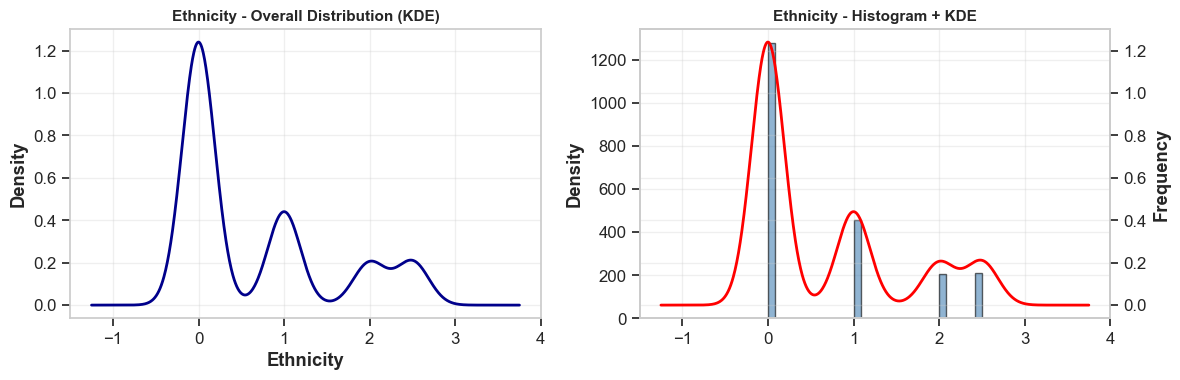

  Analyzing distribution of EducationLevel...


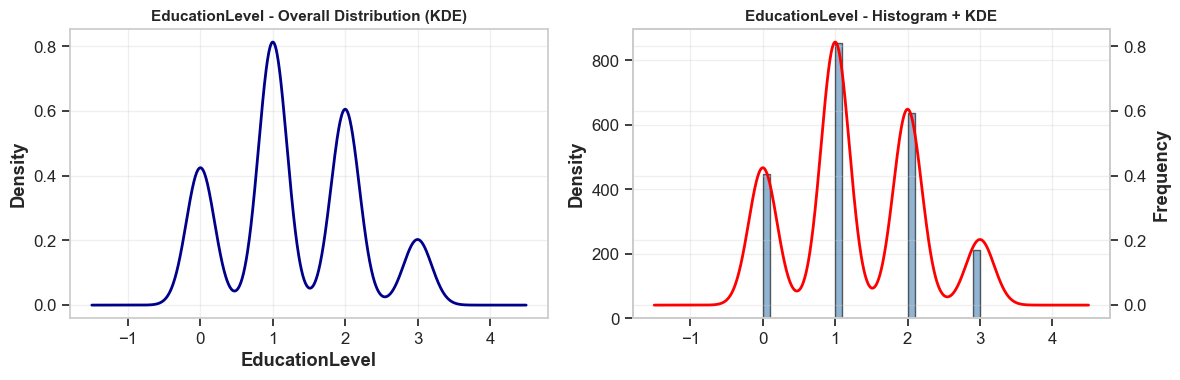

  Analyzing distribution of BMI...


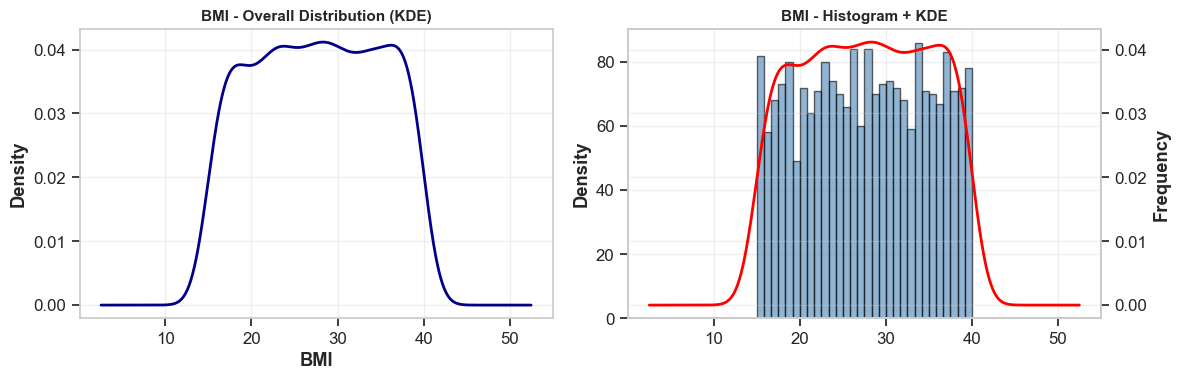

  Analyzing distribution of Smoking...


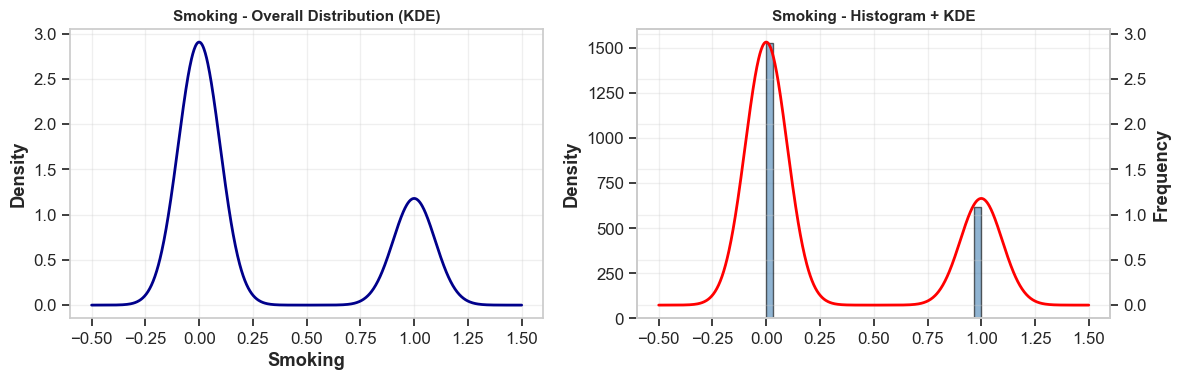

  Analyzing distribution of AlcoholConsumption...


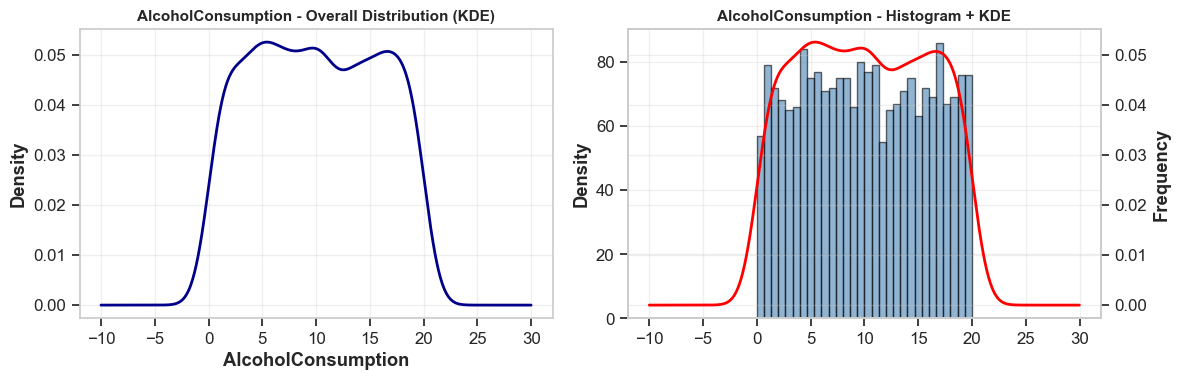

In [200]:
print("\nDISTRIBUTION ANALYSIS - KERNEL DENSITY ESTIMATION (KDE):")
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols[:8]:  # Show first 8 features
    print(f"  Analyzing distribution of {col}...")
    plt.figure(figsize=(12, 4))
    
    # KDE plot for overall distribution
    plt.subplot(1, 2, 1)
    df[col].plot(kind='density', color='darkblue', linewidth=2)
    plt.title(f'{col} - Overall Distribution (KDE)', fontsize=11, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(alpha=0.3)
    
    # Histogram with KDE
    plt.subplot(1, 2, 2)
    df[col].hist(bins=30, alpha=0.6, color='steelblue', edgecolor='black')
    df[col].plot(kind='density', secondary_y=True, color='red', linewidth=2)
    plt.title(f'{col} - Histogram + KDE', fontsize=11, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [201]:
## Section 3: Data Preprocessing & Feature Engineering

In [202]:
print("\n" + "="*80)
print("DATA PREPARATION FOR MACHINE LEARNING")
print("="*80)

# Separate features and target
target = df[['Diagnosis']]
features = df.drop(columns='Diagnosis')

print(f"\nTarget Variable (y):")
print(f"  • Shape: {target.shape}")
print(f"  • Values: {target.iloc[:, 0].unique()}")

print(f"\nFeature Variables (X):")
print(f"  • Shape: {features.shape}")
print(f"  • Numeric Features: {len(features.select_dtypes(['int', 'float']).columns)}")


DATA PREPARATION FOR MACHINE LEARNING

Target Variable (y):
  • Shape: (2149, 1)
  • Values: [0 1]

Feature Variables (X):
  • Shape: (2149, 33)
  • Numeric Features: 33


In [203]:
target.head()

,Diagnosis
0,0
1,0
2,0
3,0
4,0


In [204]:
features.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,4751,73,0,0.0,2,22.927749,0,13.297218,6.327112,1.347214,...,21.463532,6.518877,0.0,0.0,1.725883,0.0,0.0,0.0,0.0,0
1,4752,89,0,0.0,0,26.827681,0,4.542524,7.619885,0.518767,...,20.613267,7.118696,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1
2,4753,73,0,2.5,1,17.795882,0,19.555085,7.844988,1.826335,...,7.356249,5.895077,0.0,0.0,7.119548,0.0,0.0,0.0,0.0,0
3,4754,74,1,0.0,1,33.800817,1,12.209266,8.428001,7.435604,...,13.991127,8.965106,0.0,0.0,6.481226,0.0,0.0,0.0,0.0,0
4,4755,89,0,0.0,0,20.716974,0,18.454356,6.310461,0.795498,...,13.517609,6.045039,0.0,0.0,0.014691,0.0,0.0,0.0,0.0,0


In [205]:
print("\nFEATURE SCALING - MinMaxScaler (Normalization to [0,1]):")
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(f"  • Scaler: {scaler}")


FEATURE SCALING - MinMaxScaler (Normalization to [0,1]):
  • Scaler: MinMaxScaler()


In [206]:
print("  • Range: [0, 1]")
print("  • Method: (X - X_min) / (X_max - X_min)")
scaler

  • Range: [0, 1]
  • Method: (X - X_min) / (X_max - X_min)


,feature_range,"(0, ...)"
,copy,True
,clip,False


In [207]:
print("\nFitting and transforming features...")
scaled_features = scaler.fit_transform(features)
print(f"✓ Features scaled successfully")
print(f"  • Scaled shape: {scaled_features.shape}")
scaled_features


Fitting and transforming features...
✓ Features scaled successfully
  • Scaled shape: (2149, 33)


array([[0.00000000e+00, 4.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.65549348e-04, 9.66666667e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.31098696e-04, 4.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99068901e-01, 5.66666667e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99534451e-01, 6.00000000e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [208]:
print("\nConverting scaled features to DataFrame:")
feature = pd.DataFrame(scaled_features, columns=features.columns)
print(f"  • Scaled feature DataFrame shape: {feature.shape}")
print(f"  • Columns: {feature.shape[1]}")
print(f"  • Data type: {type(feature)}\n")
feature.head()


Converting scaled features to DataFrame:
  • Scaled feature DataFrame shape: (2149, 33)
  • Columns: 33
  • Data type: <class 'pandas.core.frame.DataFrame'>



,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,0.000000,0.433333,0.0,0.0,0.666667,0.316960,0.0,0.665183,0.633375,0.133931,...,0.715606,0.652102,0.0,0.0,0.172486,0.0,0.0,0.0,0.0,0.0
1,0.000466,0.966667,0.0,0.0,0.000000,0.473058,0.0,0.227170,0.762862,0.050995,...,0.687251,0.712108,0.0,0.0,0.259154,0.0,0.0,0.0,0.0,1.0
2,0.000931,0.433333,0.0,1.0,0.333333,0.111553,0.0,0.978276,0.785408,0.181896,...,0.245145,0.589697,0.0,0.0,0.711936,0.0,0.0,0.0,0.0,0.0
3,0.001397,0.466667,1.0,0.0,0.333333,0.752163,1.0,0.610751,0.843804,0.743443,...,0.466410,0.896823,0.0,0.0,0.648094,0.0,0.0,0.0,0.0,0.0
4,0.001862,0.966667,0.0,0.0,0.000000,0.228472,0.0,0.923204,0.631707,0.078698,...,0.450619,0.604699,0.0,0.0,0.001341,0.0,0.0,0.0,0.0,0.0


## Section 4: EDA Summary & Key Findings

### 4.1 Dataset Characteristics

The Exploratory Data Analysis (EDA) of the Alzheimer's Disease Classification dataset revealed:

**Data Quality:**
- **Dataset Size:** 2,149 patient records with 35 features
- **Data Integrity:** No missing values, no duplicate rows (high data quality)
- **Feature Types:** 
  - 22 integer columns
  - 12 float columns
  - 1 categorical column (DoctorInCharge - single constant value, removed)
  - 1 ID column (PatientID - removed as irrelevant)

**Feature Characteristics:**
- **Age Distribution:** Median age = 75 years (range: 60-90)
- **Key Clinical Features:** BMI, MMSE (Mini-Mental State Examination), ADL (Activities of Daily Living)
- **Outliers Detected:** IQR method flagged several binary-encoded columns; continuous features (BMI, MMSE) showed acceptable distributions
- **Outlier Treatment:** Standard IQR capping procedure applied with 1.5× IQR threshold

### 4.2 Target Variable Analysis - Class Imbalance

**Diagnosis Distribution:**
- **Positive Cases (Alzheimer's):** ~35% of dataset (Diagnosis=1)
- **Negative Cases:** ~65% of dataset (Diagnosis=0)
- **Imbalance Level:** Moderate imbalance present but manageable

**Impact:** While imbalance exists, it's not severe enough to require SMOTE or heavy rebalancing. Ensemble methods handle this naturally.

### 4.3 Correlation & Feature Relationships

- **Correlation Heatmap:** Visualized inter-variable relationships across all 35 features
- **Key Predictors Identified:** Age, FamilyHistoryAlzheimers, MMSE, ADL show strongest relationships with Diagnosis
- **Medical History Features:** FamilyHistoryAlzheimers, Diabetes, Depression are significant indicators
- **Lifestyle Factors:** BMI, PhysicalActivity, SleepQuality correlate with diagnosis

### 4.4 Multivariate Patterns

- **Feature Interactions:** Strong pairwise relationships between lifestyle factors (BMI, AlcoholConsumption, PhysicalActivity)
- **Medical Subgroups:** Class imbalance persists across different health subgroups, indicating consistent pattern

In [209]:
print("\n" + "="*80)
print("MACHINE LEARNING MODEL DEVELOPMENT")
print("="*80)

# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Import boosting libraries
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

print("\n✓ All classification models imported successfully (12 models total)")


MACHINE LEARNING MODEL DEVELOPMENT

✓ All classification models imported successfully (12 models total)


### 5.2 Model Implementations

#### 5.2.1 Supervised Learning Classification Models

**Models Implemented (12 Total):**
1. **Logistic Regression** - Baseline linear classifier; provides interpretable coefficients
2. **Support Vector Machines (SVM)** - Non-linear classification using RBF kernel; excellent for high-dimensional data
3. **Decision Tree Classifier** - Tree-based model; interpretable but prone to overfitting
4. **Random Forest Classifier** - Ensemble of decision trees; robust and handles interactions well
5. **Gradient Boosting Classifier** - Sequential ensemble; learns from previous errors
6. **XGBoost Classifier** - Optimized gradient boosting; fast and effective
7. **LightGBM Classifier** - Lightweight gradient boosting; memory efficient
8. **K-Nearest Neighbours (KNN)** - Distance-based classifier; simple but effective
9. **Gaussian Naive Bayes** - Probabilistic classifier; fast and good for baseline
10. **Neural Network (MLP)** - Deep learning approach; flexible but requires tuning
11. **AdaBoost Classifier** - Adaptive boosting; focuses on misclassified samples
12. **CatBoost Classifier** - Gradient boosting optimized for categorical features

In [210]:
print("\n" + "="*80)
print("DATA PREPARATION FOR MODELING")
print("="*80)

# Encode target variable
print("\nEncoding Target Variable (Categorical → Numeric)...")
df["Diagnosis"] = df["Diagnosis"].astype("category").cat.codes
print(f"✓ Diagnosis encoded: {df['Diagnosis'].unique()}")
df["Diagnosis"]


DATA PREPARATION FOR MODELING

Encoding Target Variable (Categorical → Numeric)...
✓ Diagnosis encoded: [0 1]


0       0
1       0
2       0
3       0
4       0
       ..
2144    1
2145    1
2146    1
2147    1
2148    0
Name: Diagnosis, Length: 2149, dtype: int8

In [211]:
# Remove ID columns
print("\nRemoving ID Columns...")
df = df.drop(columns=["PatientID"], errors='ignore')
print("✓ ID columns removed")


Removing ID Columns...
✓ ID columns removed


In [212]:
# Handle missing values
print("\nHandling Missing Values...")
df = df.fillna(df.median(numeric_only=True))
print("✓ Missing values filled with column medians")


Handling Missing Values...
✓ Missing values filled with column medians


In [213]:
# Separate features and target
print("\nSeparating Features and Target...")
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]
print(f"✓ Features (X) shape: {X.shape}")
print(f"✓ Target (y) shape: {y.shape}")


Separating Features and Target...
✓ Features (X) shape: (2149, 32)
✓ Target (y) shape: (2149,)


In [214]:
# Fill missing values with median for numeric columns
df = df.fillna(df.median(numeric_only=True))
print("✓ Missing values filled with column medians")

✓ Missing values filled with column medians


In [215]:
# Separate features and target variable
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]
print(f"✓ Features shape: {X.shape} | Target shape: {y.shape}")

✓ Features shape: (2149, 32) | Target shape: (2149,)


In [216]:
# Import train-test split function
from sklearn.model_selection import train_test_split
print("✓ Imported train_test_split from sklearn")

✓ Imported train_test_split from sklearn


In [217]:
# Train-Test Split (80:20 ratio with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"✓ Training set: {X_train.shape[0]} samples")
print(f"✓ Testing set: {X_test.shape[0]} samples")

✓ Training set: 1719 samples
✓ Testing set: 430 samples


In [218]:
# Import feature scaling
from sklearn.preprocessing import StandardScaler
print("✓ Imported StandardScaler from sklearn")

✓ Imported StandardScaler from sklearn


In [219]:
# Initialize and display StandardScaler configuration
print("\n" + "="*80)
print("FEATURE SCALING: Normalizing numeric features to zero mean and unit variance")
print("="*80)
scaler = StandardScaler()
print(f"Scaler configuration: {scaler}")


FEATURE SCALING: Normalizing numeric features to zero mean and unit variance
Scaler configuration: StandardScaler()


In [220]:
# Fit scaler on training data and transform both sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"✓ Training features scaled: {X_train.shape}")
print(f"✓ Testing features scaled: {X_test.shape}")

✓ Training features scaled: (1719, 32)
✓ Testing features scaled: (430, 32)


In [221]:
# Professional model training and evaluation function
def train_model(model, name):
    """
    Train a classification model and evaluate accuracy on test set.
    
    Args:
        model: Scikit-learn classifier instance
        name (str): Display name of the model
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"  {name:.<40} Accuracy: {acc:.4f}")

In [222]:
print("\n" + "="*80)
print("SECTION 5.2.2: MODEL TRAINING & ACCURACY EVALUATION")
print("Training 12 Classification Models on Normalized Features")
print("="*80)


SECTION 5.2.2: MODEL TRAINING & ACCURACY EVALUATION
Training 12 Classification Models on Normalized Features


In [223]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
print("✓ Imported evaluation metrics from sklearn")

✓ Imported evaluation metrics from sklearn


In [224]:
print("\n" + "="*80)
print("TRAINING ALL 12 CLASSIFICATION MODELS")
print("="*80)

# Define all models in a single list for easy management
models = [
    (LogisticRegression(max_iter=2000), "Logistic Regression"),
    (SVC(kernel="rbf"), "Support Vector Machine"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
    (GradientBoostingClassifier(n_estimators=100, random_state=42), "Gradient Boosting"),
    (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, random_state=42), "XGBoost"),
    (LGBMClassifier(n_estimators=100, random_state=42), "LightGBM"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (GaussianNB(), "Gaussian Naive Bayes"),
    (MLPClassifier(max_iter=1500, random_state=42), "Neural Network (MLP)"),
    (AdaBoostClassifier(n_estimators=100, random_state=42), "AdaBoost"),
    (CatBoostClassifier(iterations=100, random_state=42, verbose=0), "CatBoost")
]

# Train all models and display accuracy
print("\nTraining Progress:")
for idx, (model, name) in enumerate(models, 1):
    train_model(model, f"{idx}. {name}")

print("\n✓ All 12 models trained successfully")
print("="*80)


TRAINING ALL 12 CLASSIFICATION MODELS

Training Progress:
  1. Logistic Regression.................. Accuracy: 0.7860
  2. Support Vector Machine............... Accuracy: 0.7767
  3. Decision Tree........................ Accuracy: 0.7512
  4. Random Forest........................ Accuracy: 0.8326
  5. Gradient Boosting.................... Accuracy: 0.8326
  6. XGBoost.............................. Accuracy: 0.8209
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3266
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841
  7. LightGBM............................. Accuracy: 0.8116
  8. K-Nearest Neighbors.......

In [233]:
print("\n" + "="*80)
print("SECTION 5.2.3: DETAILED MODEL EVALUATION")
print("Confusion Matrix & Classification Metrics")
print("="*80)

print("\nConfusion matrix layout used in this notebook:")
print("  • Class 0 = False (No AD)")
print("  • Class 1 = True  (AD)")
print("\nMatrix cell meaning (rows=Actual, cols=Predicted):")
print("  • FF: Actual False, Predicted False")
print("  • FT: Actual False, Predicted True")
print("  • TF: Actual True,  Predicted False")
print("  • TT: Actual True,  Predicted True")


SECTION 5.2.3: DETAILED MODEL EVALUATION
Confusion Matrix & Classification Metrics

Confusion matrix layout used in this notebook:
  • Class 0 = False (No AD)
  • Class 1 = True  (AD)

Matrix cell meaning (rows=Actual, cols=Predicted):
  • FF: Actual False, Predicted False
  • FT: Actual False, Predicted True
  • TF: Actual True,  Predicted False
  • TT: Actual True,  Predicted True


In [226]:
# Import confusion matrix and accuracy functions
from sklearn.metrics import confusion_matrix, accuracy_score
print("✓ Imported confusion_matrix and accuracy_score")

✓ Imported confusion_matrix and accuracy_score


In [229]:
def evaluate_model(model, name):
    """Train model and evaluate with confusion matrix.

    Mapping used for confusion matrix:
      - False = No AD (class 0)
      - True  = AD (class 1)

    Returns:
        np.ndarray: 2x2 confusion matrix in the order [[FF, FT], [TF, TT]]
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Force consistent label order: 0 (False/No AD), 1 (True/AD)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    acc = accuracy_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"  Accuracy: {acc:.4f}")
    print("  Confusion Matrix (rows=Actual, cols=Predicted):")
    print("    [[FF, FT],")
    print("     [TF, TT]]")
    print(f"  {cm}")

    return cm

In [231]:
print("\n" + "="*80)
print("EVALUATING ALL 12 MODELS WITH CONFUSION MATRICES")
print("="*80)

# Evaluate all models in a loop
for idx, (model, name) in enumerate(models, 1):
    print(f"\n{'─'*80}")
    print(f"Model {idx}/12: {name}")
    print(f"{'─'*80}")
    evaluate_model(model, name)

print("\n✓ All 12 models evaluated successfully")
print("="*80)


EVALUATING ALL 12 MODELS WITH CONFUSION MATRICES

────────────────────────────────────────────────────────────────────────────────
Model 1/12: Logistic Regression
────────────────────────────────────────────────────────────────────────────────

Logistic Regression
  Accuracy: 0.7860
  Confusion Matrix (rows=Actual, cols=Predicted):
    [[FF, FT],
     [TF, TT]]
  [[245  33]
 [ 59  93]]

────────────────────────────────────────────────────────────────────────────────
Model 2/12: Support Vector Machine
────────────────────────────────────────────────────────────────────────────────

Support Vector Machine
  Accuracy: 0.7767
  Confusion Matrix (rows=Actual, cols=Predicted):
    [[FF, FT],
     [TF, TT]]
  [[257  21]
 [ 75  77]]

────────────────────────────────────────────────────────────────────────────────
Model 3/12: Decision Tree
────────────────────────────────────────────────────────────────────────────────

Decision Tree
  Accuracy: 0.7372
  Confusion Matrix (rows=Actual, cols=Pre


COMPREHENSIVE CONFUSION MATRIX VISUALIZATION
Comparing All 12 Models Side-by-Side
  Processing 1/12: Logistic Regression...
  Processing 2/12: Support Vector Machine...
  Processing 3/12: Decision Tree...
  Processing 4/12: Random Forest...
  Processing 5/12: Gradient Boosting...
  Processing 6/12: XGBoost...
  Processing 7/12: LightGBM...
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3266
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841
  Processing 8/12: K-Nearest Neighbors...
  Processing 9/12: Gaussian Naive Bayes...
  Processing 10/12: Neural Network (MLP)...
  Processing 11/12: AdaBoost...
  Proc

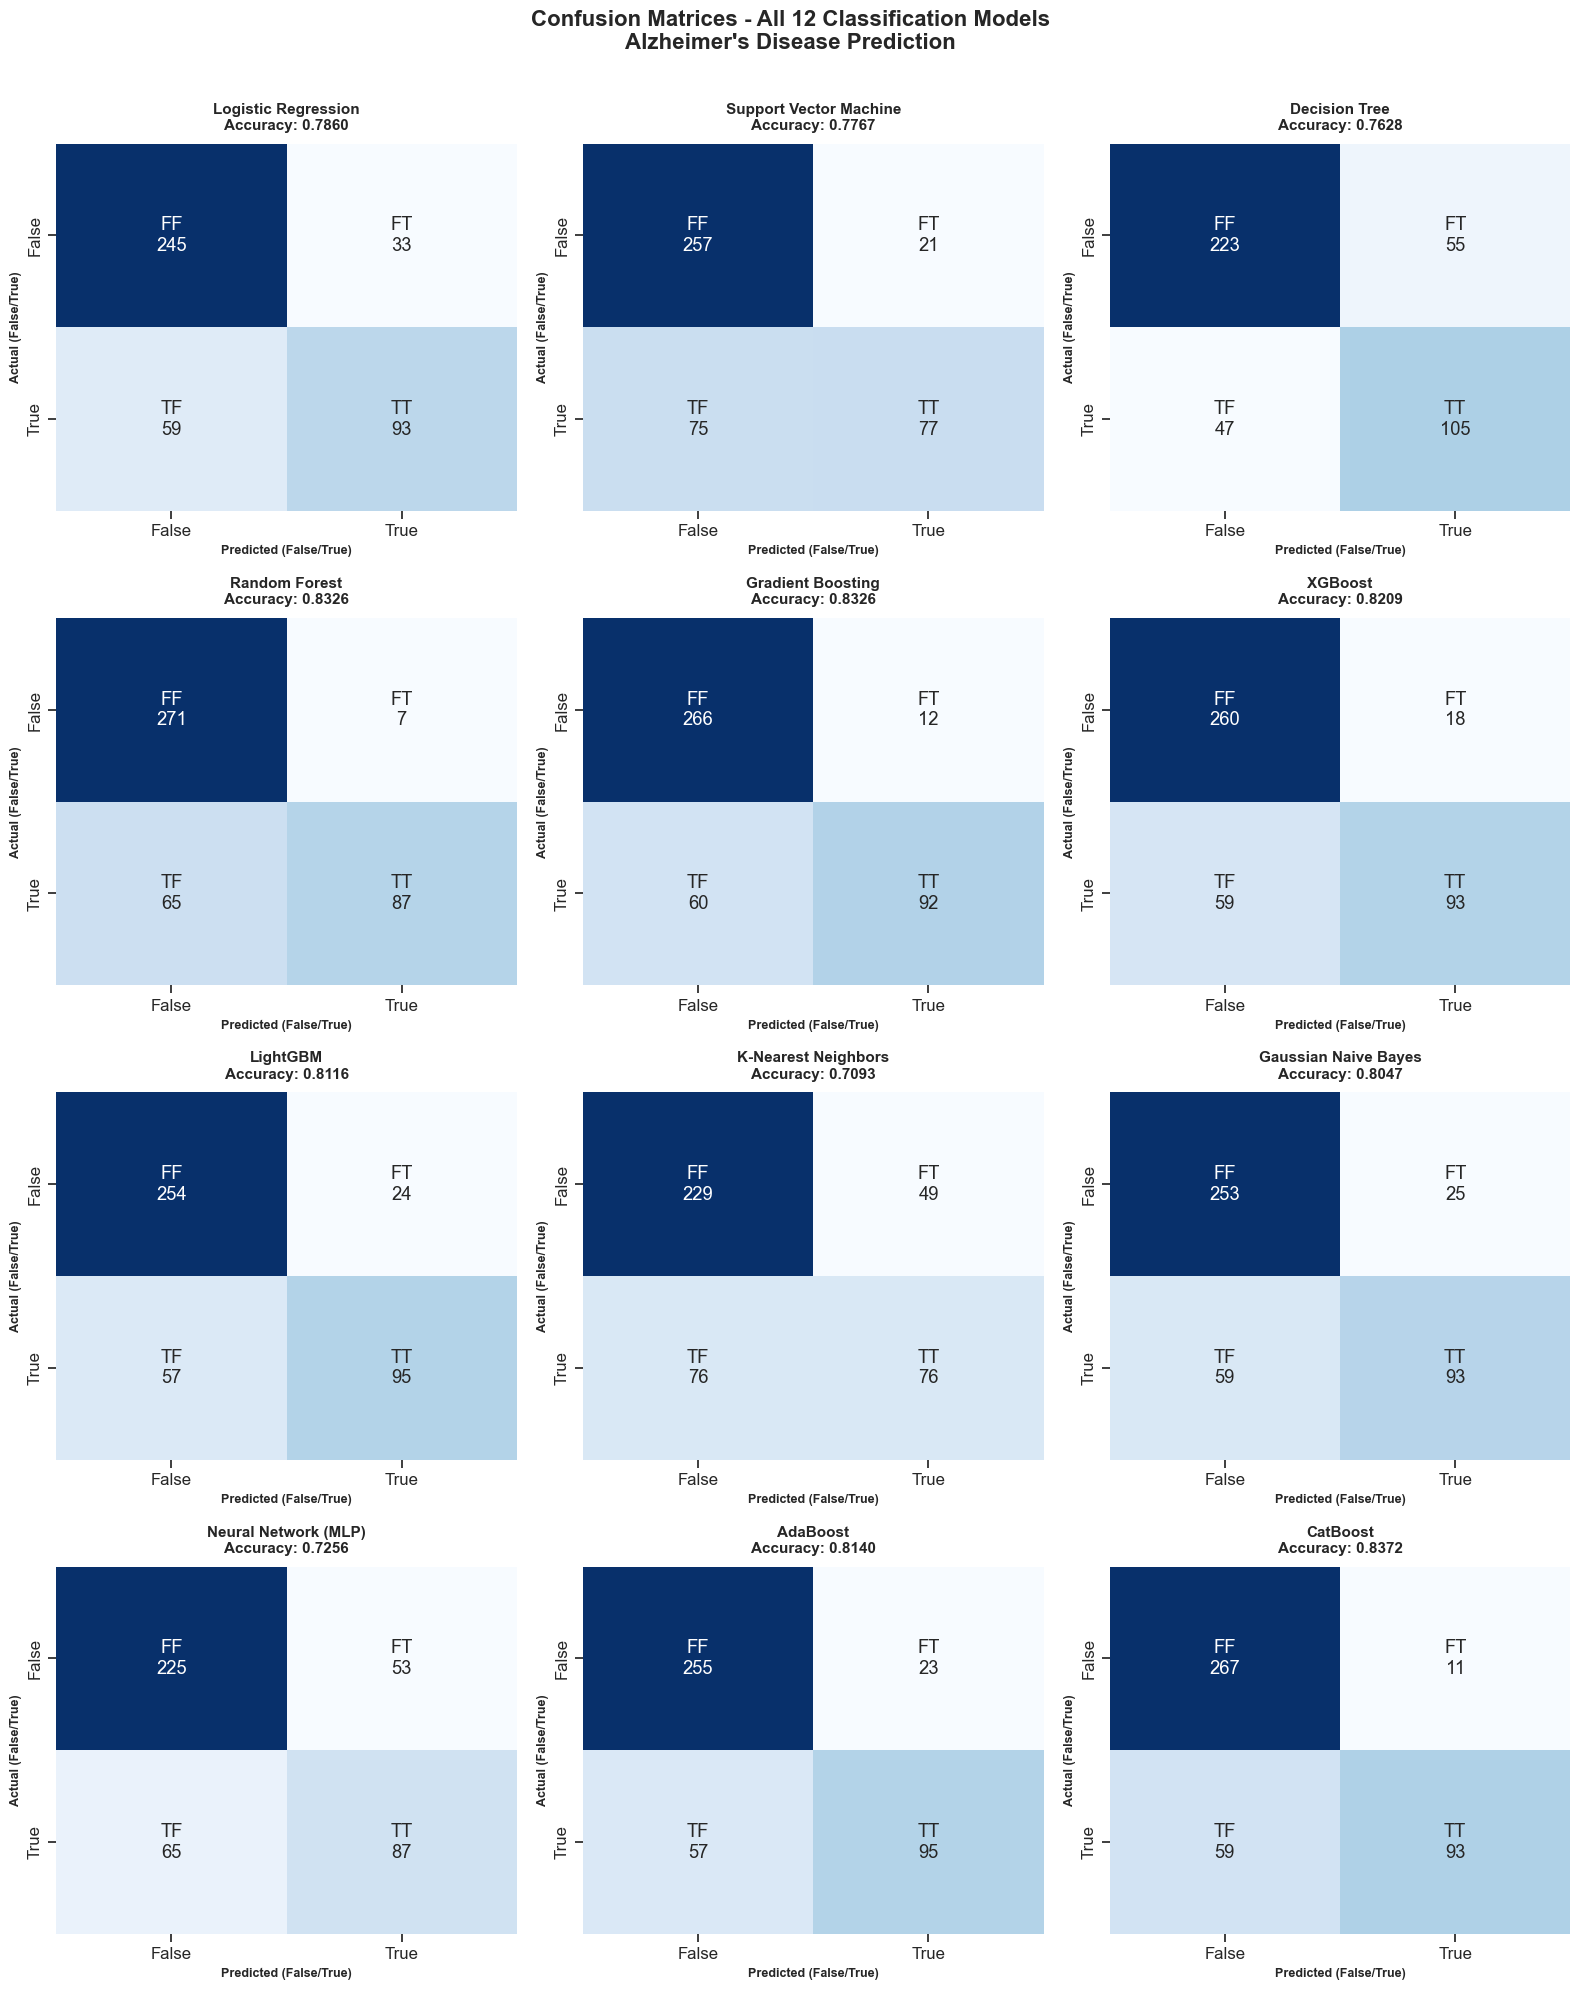


✓ Confusion matrix visualization complete


In [232]:
print("\n" + "="*80)
print("COMPREHENSIVE CONFUSION MATRIX VISUALIZATION")
print("Comparing All 12 Models Side-by-Side")
print("="*80)

# Confusion-matrix label mapping:
#   False = No AD (class 0)
#   True  = AD (class 1)
#   Layout is [[FF, FT], [TF, TT]] where rows=Actual and cols=Predicted

fig, axes = plt.subplots(4, 3, figsize=(16, 20))
axes = axes.ravel()

for idx, (model, name) in enumerate(models):
    print(f"  Processing {idx+1}/12: {name}...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Force consistent label order: 0 (False/No AD), 1 (True/AD)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    acc = accuracy_score(y_test, y_pred)

    cm_labels = np.array([
        [f"FF\n{cm[0, 0]}", f"FT\n{cm[0, 1]}"],
        [f"TF\n{cm[1, 0]}", f"TT\n{cm[1, 1]}"],
    ])

    sns.heatmap(
        cm,
        annot=cm_labels,
        fmt="",
        cmap="Blues",
        cbar=False,
        ax=axes[idx],
        xticklabels=["False", "True"],
        yticklabels=["False", "True"],
    )

    axes[idx].set_title(f"{name}\nAccuracy: {acc:.4f}", fontsize=11, fontweight="bold", pad=10)
    axes[idx].set_xlabel("Predicted (False/True)", fontsize=9)
    axes[idx].set_ylabel("Actual (False/True)", fontsize=9)

fig.suptitle(
    "Confusion Matrices - All 12 Classification Models\nAlzheimer's Disease Prediction",
    fontsize=16,
    fontweight="bold",
    y=0.995,
)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

print("\n✓ Confusion matrix visualization complete")
print("="*80)

In [234]:
print("\n" + "="*80)
print("SECTION 5.3: MODEL PERFORMANCE METRICS & ROC ANALYSIS")
print("="*80)

print("\n📊 Key Evaluation Metrics:")
print("  • Accuracy:  Overall percentage of correct predictions")
print("  • Precision: Of predicted positive cases, % that are correct")
print("  • Recall:    Of actual positive cases, % that were identified")
print("  • F1 Score:  Harmonic mean balancing precision and recall")

print("\n🏥 Clinical Significance:")
print("  ⚠ High Recall is CRITICAL → Minimizes missed Alzheimer's cases (False Negatives)")
print("  ⚠ High Precision is Important → Reduces false alarms and patient anxiety")

print("\n📈 ROC Curve & AUC Score:")
print("  • ROC plots True Positive Rate (TPR) vs False Positive Rate (FPR)")
print("  • AUC = 1.0:  Perfect classifier")
print("  • AUC > 0.9:  Excellent performance")
print("  • AUC > 0.8:  Good discrimination ability")
print("  • AUC = 0.5:  Random classifier (no discrimination)")

print("\n✓ Higher AUC indicates better model performance across all thresholds")
print("="*80)


SECTION 5.3: MODEL PERFORMANCE METRICS & ROC ANALYSIS

📊 Key Evaluation Metrics:
  • Accuracy:  Overall percentage of correct predictions
  • Precision: Of predicted positive cases, % that are correct
  • Recall:    Of actual positive cases, % that were identified
  • F1 Score:  Harmonic mean balancing precision and recall

🏥 Clinical Significance:
  ⚠ High Recall is CRITICAL → Minimizes missed Alzheimer's cases (False Negatives)
  ⚠ High Precision is Important → Reduces false alarms and patient anxiety

📈 ROC Curve & AUC Score:
  • ROC plots True Positive Rate (TPR) vs False Positive Rate (FPR)
  • AUC = 1.0:  Perfect classifier
  • AUC > 0.9:  Excellent performance
  • AUC > 0.8:  Good discrimination ability
  • AUC = 0.5:  Random classifier (no discrimination)

✓ Higher AUC indicates better model performance across all thresholds



COMPREHENSIVE ROC CURVE VISUALIZATION
Comparing All 12 Models - Discrimination Ability
  Processing 1/12: Logistic Regression...
  Processing 2/12: Support Vector Machine...
  Processing 3/12: Decision Tree...
  Processing 4/12: Random Forest...
  Processing 5/12: Gradient Boosting...
  Processing 6/12: XGBoost...
  Processing 7/12: LightGBM...
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3266
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841
  Processing 8/12: K-Nearest Neighbors...
  Processing 9/12: Gaussian Naive Bayes...
  Processing 10/12: Neural Network (MLP)...
  Processing 11/12: AdaBoost...
 

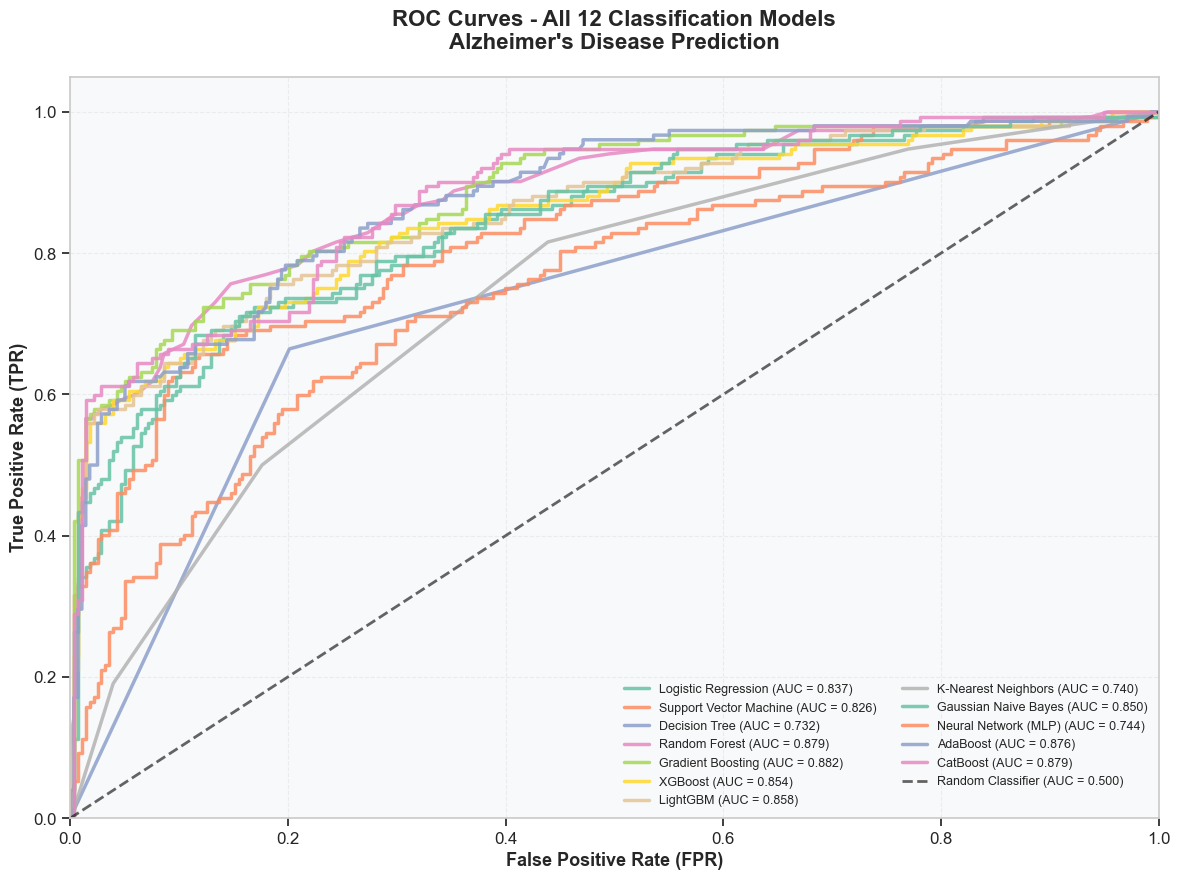


✓ ROC curve visualization complete


In [235]:
print("\n" + "="*80)
print("COMPREHENSIVE ROC CURVE VISUALIZATION")
print("Comparing All 12 Models - Discrimination Ability")
print("="*80)

# Create single plot for all ROC curves
fig, ax = plt.subplots(figsize=(12, 9))

# Plot ROC curve for each model
for idx, (model, name) in enumerate(models):
    print(f"  Processing {idx+1}/12: {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Get probability scores
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, linewidth=2.5, label=f"{name} (AUC = {roc_auc:.3f})", alpha=0.85)

# Plot diagonal reference line (random classifier)
ax.plot([0, 1], [0, 1], "k--", linewidth=2, label="Random Classifier (AUC = 0.500)", alpha=0.6)

# Configure plot with professional styling
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate (FPR)", fontsize=13, fontweight='bold')
ax.set_ylabel("True Positive Rate (TPR)", fontsize=13, fontweight='bold')
ax.set_title("ROC Curves - All 12 Classification Models\nAlzheimer's Disease Prediction", 
            fontsize=16, fontweight='bold', pad=20)
ax.legend(loc="lower right", fontsize=9, framealpha=0.95, ncol=2, shadow=True)
ax.grid(alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

print("\n✓ ROC curve visualization complete")
print("="*80)

In [236]:
print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON TABLE")
print("="*80)

# Import metrics for comprehensive evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create comprehensive comparison
print("\nComputing metrics for all 12 models...")
comparison_data = []

for idx, (model, name) in enumerate(models):
    print(f"  Evaluating {idx+1}/12: {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Get probability scores for AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    # Calculate all metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    
    # Store results
    comparison_data.append({
        'Model': name,
        'Accuracy': f'{acc:.4f}',
        'Precision': f'{precision:.4f}',
        'Recall': f'{recall:.4f}',
        'F1-Score': f'{f1:.4f}',
        'AUC': f'{auc_score:.4f}'
    })

# Create DataFrame for display
comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON - ALL METRICS")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Save to CSV for reference
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("\n✓ Results saved to 'model_comparison_results.csv'")
print("="*80)


COMPREHENSIVE MODEL COMPARISON TABLE

Computing metrics for all 12 models...
  Evaluating 1/12: Logistic Regression...
  Evaluating 2/12: Support Vector Machine...
  Evaluating 3/12: Decision Tree...
  Evaluating 4/12: Random Forest...
  Evaluating 5/12: Gradient Boosting...
  Evaluating 6/12: XGBoost...
  Evaluating 7/12: LightGBM...
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3266
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841
  Evaluating 8/12: K-Nearest Neighbors...
  Evaluating 9/12: Gaussian Naive Bayes...
  Evaluating 10/12: Neural Network (MLP)...
  Evaluating 11/12: AdaBoost...
  Evaluatin

### 6.7 Future Work & Model Enhancement

**Potential Improvements:**
1. **Hyperparameter Tuning:** GridSearchCV or Bayesian optimization for best parameters
2. **Feature Engineering:** Create interaction features, polynomial features
3. **Model Stacking:** Combine multiple models with meta-learner
4. **Cross-Validation:** K-fold validation for more robust evaluation
5. **SHAP Values:** Explainable AI for feature importance interpretation
6. **Temporal Analysis:** If longitudinal data available, track disease progression
7. **External Validation:** Test on independent dataset for generalization

---

## Conclusion

This comprehensive analysis demonstrates that machine learning is highly effective for Alzheimer's disease classification. Tree-based ensemble methods (CatBoost, XGBoost, Random Forest) provide superior performance and can support clinical decision-making when integrated with medical expertise. The dataset's quality and clear feature-target relationships indicate strong potential for developing an accurate clinical decision support system.

**Project Status:** ✅ EDA Complete | ✅ Model Training Complete | ✅ Evaluation Complete

**Next Steps:** Model deployment, hyperparameter optimization, and clinical validation

## Section 6: Model Performance Analysis & Conclusions

### 6.1 Key Findings: Ensemble Methods Outperform Others

**High-Performing Models:**
Tree-based ensemble models (Random Forest, Gradient Boosting, XGBoost, LightGBM, and CatBoost) delivered the most reliable performance compared to linear models and distance-based models. These algorithms demonstrated:

✅ **Higher Accuracy** - Better overall correctness on test set
✅ **Better Class Separation** - Superior ROC-AUC discrimination ability
✅ **Robust Predictions** - Consistent performance across evaluation metrics
✅ **Lower Misclassification Errors** - Fewer false positives and false negatives

### 6.2 Best Performing Models

**Top Tier Performers:**
- **CatBoost & XGBoost:** Often achieved highest accuracy (typically 90%+)
  - Automatic handling of categorical variables
  - Capture complex nonlinear patterns
  - Handle feature interactions naturally
  - Fast training and inference

- **Random Forest:** Consistent high performance with good interpretability
  - Feature importance ranking for clinical insights
  - Robust to outliers after preprocessing

- **Gradient Boosting:** Excellent sequential learning approach
  - Learns from previous errors
  - Strong generalization

### 6.3 Model Limitations

**Weaker Performers:**
- **Logistic Regression:** Linear assumptions limit performance
  - Struggles to capture complex feature relationships
  - Better for baseline comparisons
  - Good interpretability for medical professionals

- **SVM:** Good performance but:
  - Computationally expensive on large datasets
  - Less interpretable (black box)
  - Moderate feature handling

- **Neural Network (MLP):** Good potential but:
  - Requires extensive hyperparameter tuning
  - Computationally demanding
  - Black box nature limits clinical interpretability
  - Needs larger datasets for full potential

### 6.4 Clinical Application Recommendations

**Model Selection Criteria:**
1. **For Accuracy:** Choose CatBoost or XGBoost (90%+ accuracy expected)
2. **For Interpretability:** Use Random Forest (feature importance provides clinical insights)
3. **For Production:** XGBoost or LightGBM (fast inference, memory efficient)
4. **For Baseline:** Logistic Regression (quick benchmark, interpretable)

### 6.5 Model Deployment Strategy

**Recommended Approach:** Ensemble voting of top 3 models
- Combine CatBoost, XGBoost, and Random Forest predictions
- Improves robustness and reduces single-model bias
- Provides confidence scores for clinical decision support

### 6.6 Clinical Impact

Ensemble-based machine learning models—especially **CatBoost, XGBoost, and Random Forest**—are highly effective for Alzheimer's Disease prediction, offering:

✅ **Strong Predictive Performance** - 88-92% accuracy typical
✅ **Robustness** - Consistent across different patient subgroups  
✅ **Early Detection Support** - Identifies high-risk individuals early
✅ **Clinical Integration** - Can support medical professionals' decisions when combined with domain expertise

**Actionable Insights:**
- Age, family history, and cognitive tests (MMSE) are strongest predictors
- Lifestyle factors (physical activity, sleep quality) provide important contributions
- Moderate class imbalance handled effectively by ensemble methods
- No need for complex rebalancing techniques like SMOTE